In [6]:
import sys
sys.path.insert(1, '../')

from pckgs.import_pckg import *
from pckgs.units import *
# importing FIRAS data
from FIRAS import *

# importing generic constants and functions
from const_func_general import *
# importing distortion specific constants and functions
from cons_func_distortion import *


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from pckgs.plot_params import params
import matplotlib
matplotlib.rcParams.update(params)
#plt.rcParams['font.family'] = 'DeJavu Serif'
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
# importing data for plotting
# COBE-FIRAS, McDermott et al (1911.05086)
McDermott_Witte_19_FIRAS_2Dary = np.transpose( np.array( pd.read_csv('../data/McDermott_Witte_19_FIRAS.csv') ) )

# COBE-FIRAS from Caputo et al  (2002.05165): Homogeneous and Inhomogeneous
Caputo_20_FIRAS_2Dary   = np.transpose( np.array( pd.read_csv('../data/Caputo_20_FIRAS.csv') ) )
Caputo_20_FIRAS_ho_2Dary   = np.transpose( np.array( pd.read_csv('../data/Caputo_20_FIRAS_ho.csv') ) )
Caputo_20_FIRAS_inho_2Dary = np.transpose( np.array( pd.read_csv('../data/Caputo_20_FIRAS_inho.csv') ) )

# COBE-FIRAS from Mirizzi et al (0901.0014)
Mirizzi_09_FIRAS_extended_2Dary = np.transpose( np.array( pd.read_csv('../data/Mirizzi_09_FIRAS_extended.csv') ) )

# COBE-FIRAS Frozen in
frozen_FIRAS_2Dary   = np.array( pd.read_excel('../data/mAp_eps_FIRAS_ho.xlsx') )

# PIXIE Projection from Caputo et al (2002.05165): inhomogeneous
Caputo_20_PIXIE_inho_2Dary = np.array( pd.read_csv('../data/Caputo_20_PIXIE_inho.csv') ) 


# Importing other experiments

# Cavendish
Cavendish_2Dary = np.transpose( np.array( pd.read_csv('../data/Cavendish.csv') ) )

# CROWS
CROWS_2Dary = np.array( pd.read_csv('../data/CROWS_.csv') ) 

# Dark SRF (2301.11512 Romanenko et al)
DarkSRF_2Dary = np.array( pd.read_csv('../data/DarkSRF.csv') ) 


# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
DarkSRF23_Pathfinder_Proj_2Dary = np.array( pd.read_csv('../data/DarkSRF23_Pathfinder_Proj_.csv') ) 

# Solar Luminosity (2304.12907 Li&Xu)
SolarLuminosity_2Dary  = np.array( pd.read_csv('../data/SolarLuminosity_.csv') ) 

# Xenon Solar (2112.12116 XENON1T Solar DP)
XenonSolar_2Dary  = np.array( pd.read_csv('../data/XenonSolar_.csv') ) 

# Jupyter (2312.06746 Yan&Li&Fan)
Jupiter_2Dary = np.transpose( np.array( pd.read_csv('../data/Jupiter.csv') ) )

# Earth (Phys.Rev.Lett. 73 (1994) 514-517)
Earth_2Dary   = np.transpose( np.array( pd.read_csv('../data/Earth.csv') ) )

#pure energy injection 
pure_energy_injection_2Dary =np.transpose( np.array( pd.read_csv('../data/pure_energy_injection.csv') ) )

# CMB Anisotropy (Sokolenko et.al. 2024)
CMBAnis_Sokolenko_2Dary = np.transpose( np.array( pd.read_csv('../data/CMBAnis_Sokolenko_24.csv') ) )

# CMB Anisotropy (Huang et.al. 2024)
CMBAnis_Huang_2Dary = np.transpose( np.array( pd.read_csv('../data/CMBAnis_Huang_24.csv') ) )



In [8]:
# Importing probability

file_name = "../data/Probability.npz"
if file_name is not None:
    file = np.load(file_name)
# x:   1D array
x_1Dary_P_import = file['x_P_scan_ary']

# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_P_import = file['mAp_P_scan_ary']

# -------------------------------------------------------
# P/eps^2: 2D array
P_over_eps2_2Dary_import = file['P_over_eps2_scan_2Dary']


zres_2Dary_import=file['zres_scan_2Dary']


# Interpolation: Log10(P/eps^2), Log10(z_res)
# Input: Log10(mAp), x

Reg_trans= 10**(-100)

log10P_over_eps2_interp = interp2d( np.log10(mAp_1Dary_P_import), x_1Dary_P_import, np.log10(P_over_eps2_2Dary_import + Reg_trans) )
log10zres_interp        = interp2d( np.log10(mAp_1Dary_P_import), x_1Dary_P_import, np.log10(zres_2Dary_import + Reg_trans)  )

# P/eps^2 from 2D interpolation
# Input: Log10(mAp), x
def P_over_eps2_interp(mAp, x):
    
    P_over_eps2_interp = 10**log10P_over_eps2_interp( np.log10(mAp), x )
    
    return P_over_eps2_interp

# zres from 2D interpolation
# Input: Log10(mAp), x
# Note! Here, 'zres_interp' only picks the minimal zres when there is multi solution
def zres_interp(mAp,x):
    
    zres_interp = 10**log10zres_interp( np.log10(mAp), x )
    
    return zres_interp



In [9]:
# rtrans_xp1em1 = 100

rtrans_xp1em1 = 100

# Power = -2
xp_z_trans_r_trans_m2_list = np.transpose([ [0.001,2.92e5,2.97], [0.01,2.10e5,5.34], [0.1,1.97423492e5,rtrans_xp1em1], [1,1.42e5,6.05], [5, 1.00e5, 5.23], [15, 9.98e4, 2.49] ])

log10_xp_z_trans_m2_interp = interp1d(np.log10(xp_z_trans_r_trans_m2_list[0]), np.log10(xp_z_trans_r_trans_m2_list[1]), fill_value="extrapolate")
log10_xp_r_trans_m2_interp = interp1d(np.log10(xp_z_trans_r_trans_m2_list[0]), np.log10(xp_z_trans_r_trans_m2_list[2]), fill_value="extrapolate")

# Power = -1
xp_z_trans_r_trans_m1_list = np.transpose([ [0.001,3.09e5,3.28], [0.01,2.25e5,7.13], [0.1,1.93335107e5,rtrans_xp1em1], [1,1.31e5,5.29], [5,8.46e4,5.49], [15,9.99e4,2.49]])

log10_xp_z_trans_m1_interp = interp1d(np.log10(xp_z_trans_r_trans_m1_list[0]), np.log10(xp_z_trans_r_trans_m1_list[1]), fill_value="extrapolate")
log10_xp_r_trans_m1_interp = interp1d(np.log10(xp_z_trans_r_trans_m1_list[0]), np.log10(xp_z_trans_r_trans_m1_list[2]), fill_value="extrapolate")

# Power = 0
xp_z_trans_r_trans_0_list = np.transpose([ [0.001,4.1e5,0.732], [0.01,2.30e5,8.42], [0.1,1.93335107e5,rtrans_xp1em1], [1,1.17e5,3.100], [5,7.49e4,4.72], [15, 9.36e4, 2.49] ])

log10_xp_z_trans_0_interp = interp1d(np.log10(xp_z_trans_r_trans_0_list[0]), np.log10(xp_z_trans_r_trans_0_list[1]), fill_value="extrapolate")
log10_xp_r_trans_0_interp = interp1d(np.log10(xp_z_trans_r_trans_0_list[0]), np.log10(xp_z_trans_r_trans_0_list[2]), fill_value="extrapolate")

# Power = 1
xp_z_trans_r_trans_1_list = np.transpose([ [0.001,7.1e5,0.27], [0.01,2.31e5,8.88], [0.1,1.93662158e5,rtrans_xp1em1], [1,1.03e5,2.53], [5,6.65e4,3.18], [15,9.0e4,2.55] ])

log10_xp_z_trans_1_interp = interp1d(np.log10(xp_z_trans_r_trans_1_list[0]), np.log10(xp_z_trans_r_trans_1_list[1]), fill_value="extrapolate")
log10_xp_r_trans_1_interp = interp1d(np.log10(xp_z_trans_r_trans_1_list[0]), np.log10(xp_z_trans_r_trans_1_list[2]), fill_value="extrapolate")

# Power = 2
xp_z_trans_r_trans_2_list = np.transpose([ [0.001,8.62e5,0.195], [0.01,2.31e5,9.00], [0.1,1.93662158e5,rtrans_xp1em1], [1, 9.03e4, 1.94], [5, 5.12e4, 1.46], [15,8.89e4,2.55] ])


log10_xp_z_trans_2_interp = interp1d(np.log10(xp_z_trans_r_trans_2_list[0]), np.log10(xp_z_trans_r_trans_2_list[1]), fill_value="extrapolate")
log10_xp_r_trans_2_interp = interp1d(np.log10(xp_z_trans_r_trans_2_list[0]), np.log10(xp_z_trans_r_trans_2_list[2]), fill_value="extrapolate")

# ==============================================================================
# ==============================================================================

# ------------------------------------------------------------------------------
# Power = -2
def z_trans_m2_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_m2_list[0]
    z_trans_list    = xp_z_trans_r_trans_m2_list[1]
    r_trans_list    = xp_z_trans_r_trans_m2_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_m2_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_m2_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    z_trans_ext_list = np.where( xp<=xp_min, z_trans_min, np.where( xp<=xp_max, xp_z_trans_func(xp), z_trans_max ) )

    return z_trans_ext_list


def r_trans_m2_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_m2_list[0]
    z_trans_list    = xp_z_trans_r_trans_m2_list[1]
    r_trans_list    = xp_z_trans_r_trans_m2_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_m2_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_m2_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    r_trans_ext_list = np.where( xp<=xp_min, r_trans_min, np.where( xp<=xp_max, xp_r_trans_func(xp), r_trans_max ) )

    return r_trans_ext_list

# ------------------------------------------------------------------------------
# Power = -1
def z_trans_m1_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_m1_list[0]
    z_trans_list    = xp_z_trans_r_trans_m1_list[1]
    r_trans_list    = xp_z_trans_r_trans_m1_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_m1_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_m1_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    z_trans_ext_list = np.where( xp<=xp_min, z_trans_min, np.where( xp<=xp_max, xp_z_trans_func(xp), z_trans_max ) )

    return z_trans_ext_list


def r_trans_m1_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_m1_list[0]
    z_trans_list    = xp_z_trans_r_trans_m1_list[1]
    r_trans_list    = xp_z_trans_r_trans_m1_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_m1_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_m1_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    r_trans_ext_list = np.where( xp<=xp_min, r_trans_min, np.where( xp<=xp_max, xp_r_trans_func(xp), r_trans_max ) )

    return r_trans_ext_list


# ------------------------------------------------------------------------------
# Power = 0
def z_trans_0_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_0_list[0]
    z_trans_list    = xp_z_trans_r_trans_0_list[1]
    r_trans_list    = xp_z_trans_r_trans_0_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_0_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_0_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    z_trans_ext_list = np.where( xp<=xp_min, z_trans_min, np.where( xp<=xp_max, xp_z_trans_func(xp), z_trans_max ) )

    return z_trans_ext_list


def r_trans_0_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_0_list[0]
    z_trans_list    = xp_z_trans_r_trans_0_list[1]
    r_trans_list    = xp_z_trans_r_trans_0_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_0_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_0_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    r_trans_ext_list = np.where( xp<=xp_min, r_trans_min, np.where( xp<=xp_max, xp_r_trans_func(xp), r_trans_max ) )

    return r_trans_ext_list

# ------------------------------------------------------------------------------
# Power = 1
def z_trans_1_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_1_list[0]
    z_trans_list    = xp_z_trans_r_trans_1_list[1]
    r_trans_list    = xp_z_trans_r_trans_1_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_1_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_1_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    z_trans_ext_list = np.where( xp<=xp_min, z_trans_min, np.where( xp<=xp_max, xp_z_trans_func(xp), z_trans_max ) )

    return z_trans_ext_list

def r_trans_1_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_1_list[0]
    z_trans_list    = xp_z_trans_r_trans_1_list[1]
    r_trans_list    = xp_z_trans_r_trans_1_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_1_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_1_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    r_trans_ext_list = np.where( xp<=xp_min, r_trans_min, np.where( xp<=xp_max, xp_r_trans_func(xp), r_trans_max ) )

    return r_trans_ext_list

# ------------------------------------------------------------------------------
# Power = 2
def z_trans_2_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_2_list[0]
    z_trans_list    = xp_z_trans_r_trans_2_list[1]
    r_trans_list    = xp_z_trans_r_trans_2_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_2_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_2_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    z_trans_ext_list = np.where( xp<=xp_min, z_trans_min, np.where( xp<=xp_max, xp_z_trans_func(xp), z_trans_max ) )

    return z_trans_ext_list

def r_trans_2_Func(xp):
    
    xp_list         = xp_z_trans_r_trans_2_list[0]
    z_trans_list    = xp_z_trans_r_trans_2_list[1]
    r_trans_list    = xp_z_trans_r_trans_2_list[2]
    
    xp_z_trans_func = lambda xp: 10**log10_xp_z_trans_2_interp(np.log10(xp))
    xp_r_trans_func = lambda xp: 10**log10_xp_r_trans_2_interp(np.log10(xp))
    
    [xp_min, z_trans_min, r_trans_min] = [ xp_list[0]  , z_trans_list[0]  , r_trans_list[0]  ]
    [xp_max, z_trans_max, r_trans_max] = [ xp_list[-1] , z_trans_list[-1] , r_trans_list[-1] ]
    
    r_trans_ext_list = np.where( xp<=xp_min, r_trans_min, np.where( xp<=xp_max, xp_r_trans_func(xp), r_trans_max ) )

    return r_trans_ext_list

# ==============================================================================
# ==============================================================================


def z_trans_Func(xp):
    
    # return z_trans_m2_Func(xp)
    return z_trans_m1_Func(xp)
    # return z_trans_0_Func(xp)
    # return z_trans_1_Func(xp)
    # return z_trans_2_Func(xp)

def r_trans_Func(xp):
    
    # return r_trans_m2_Func(xp)
    return r_trans_m1_Func(xp)
    # return r_trans_0_Func(xp)
    # return r_trans_1_Func(xp)
    # return r_trans_2_Func(xp)

# Trans_mu varying with xp
def Trans_mu_Vary(zp,xp):
    
    Trans_mu = 1 - np.exp( -((1+zp)/(1+z_trans_Func(xp)))**r_trans_Func(xp) )
    
    return Trans_mu

# Trans_y varying with xp
def Trans_y_Vary(zp,xp):
    
    Trans_y  = 1 - Trans_mu_Vary(zp,xp)
    
    return Trans_y

xp_list_test       = [0.001,0.01,0.1,1,5,15]

z_trans_list_test  = z_trans_m1_Func(xp_list_test)
r_trans_list_test  = r_trans_m1_Func(xp_list_test)

zp_test            = 1000

print('xp_list            = ', xp_list_test      )
print('z_trans_list       = ', z_trans_list_test )
print('r_trans_list       = ', r_trans_list_test )
print('')
print('zp_test            = ', zp_test)
print('')
print('Trans_mu_Vary_list =', Trans_mu_Vary(zp_test,xp_list_test) )
print('')
print('(Trans_mu_Vary + Trans_mu_Vary)_list =', Trans_mu_Vary(zp_test,xp_list_test) + Trans_y_Vary(zp_test,xp_list_test) )

xp_list            =  [0.001, 0.01, 0.1, 1, 5, 15]
z_trans_list       =  [309000.    225000.    193335.107 131000.     84600.     99900.   ]
r_trans_list       =  [  3.28   7.13 100.     5.29   5.49   2.49]

zp_test            =  1000

Trans_mu_Vary_list = [6.82897228e-09 0.00000000e+00 0.00000000e+00 6.33748609e-12
 2.63689071e-11 1.05232449e-05]

(Trans_mu_Vary + Trans_mu_Vary)_list = [1. 1. 1. 1. 1. 1.]


In [10]:
# Delta_I/eps^2 for RAD universe (Approx)
# x :      1D array N_x
# xp:      1D array N_xp  (integration variable)
# output:  1D array N_x

# ----------------------------------------------------------------------
# M-Term Only
# ----------------------------------------------------------------------
def DeltaI_over_eps2_mu_M_int(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):

    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # (M-Term Green's Func)
    # Input x is array:
    # 2D array: N_x * N_xp  
    greens_mu_ary    =  greens_mu_M(x, x_prime_int, z_res, T0, units=units)
    
    # P(A->Ap)/eps^2
    # 1D array: N_xp
    P_over_eps2_ary  =  np.transpose(P_over_eps2_interp(m_Aprime, x_prime_int))[0]
    
    # Trans_mu Func
    # 1D array: N_xp
    Trans_mu_Vary_ary     =  Trans_mu_Vary(z_res, x_prime_int)

    # Delta_I(A->Ap)
    # int over xp
    # 1D array: N_x
    DeltaI_AToAp_over_eps2 = (-1)/(2*zeta(3)) * np.trapz(Trans_mu_Vary_ary * greens_mu_ary *  x_prime_int**2/(np.exp(x_prime_int)-1) * P_over_eps2_ary, x_prime_int)

    return DeltaI_AToAp_over_eps2


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Test of the Code
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

x_test = np.array( [0.1,1,15] )

x_prime_int_test = np.logspace(-3,2,1000)

# m_Ap_test = np.sqrt( mAsq(5*10**4, 0) )

m_Ap_test = 10**(-7) # in eV

zres_test = zres_interp(m_Ap_test, 0)[0]  # Here I choose x_prime = 0

T0_test   = TCMB_0    #in eV

# DeltaI in mu-era: M-term, Integration
DeltaI_over_eps2_mu_M_int_test = DeltaI_over_eps2_mu_M_int( x_test, x_prime_int_test, m_Ap_test, T0_test, units = 'MJy')

print('--------------------------------------------------')
print('For (int)')
print('--------------------------------------------------')
print('Lower Int Limit of x_prime = ', x_prime_int_test[0])
print('Upper Int Limit of x_prime = ', x_prime_int_test[-1])
print('Grid Number of x_prime     = ', len(x_prime_int_test))
print('')
print('============================================================================')
print('x                                                         = ', x_test)
print('T0                                                        = ', T0_test/K, 'K')
print('m_Ap                                                      = ', m_Ap_test, 'eV')
print('z_res                                                     = ', zres_test)
print('============================================================================')
print('Delta_I/eps^2(M)                                          = ', DeltaI_over_eps2_mu_M_int_test, 'MJy')

--------------------------------------------------
For (int)
--------------------------------------------------
Lower Int Limit of x_prime =  0.001
Upper Int Limit of x_prime =  100.0
Grid Number of x_prime     =  1000

x                                                         =  [ 0.1  1.  15. ]
T0                                                        =  2.7255 K
m_Ap                                                      =  1e-07 eV
z_res                                                     =  31859.037608673825
Delta_I/eps^2(M)                                          =  [-11111422.78164616 -58344119.86316974    702810.49552635] MJy


In [11]:
# Delta_I/eps^2
# x :      1D array N_x
# xp:      1D array N_xp  (integration variable)
# output:  1D array N_x

# DeltaI/eps^2: Y-part
def DeltaI_over_eps2_Y_int(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # Green's Func at y-era: Y-part
    # 2D array: N_x * N_xp
    greens_Y_ary = greens_Y(x, x_prime_int, z_res, T0, units=units)
    
    # P(A->Ap)/eps^2
    # 1D array: N_xp
    P_over_eps2_ary = np.transpose( P_over_eps2_interp(m_Aprime, x_prime_int) )[0]
    
    # Trans_y Func
    # 1D array: N_xp
    Trans_y_Vary_ary     =  Trans_y_Vary(z_res, x_prime_int)
    
    # Delta_I(A->Ap)
    # int over xp
    # 1D array: N_x
    # DeltaI_over_eps2_Y = (-1)/(2*zeta(3)) * np.trapz( greens_Y_ary *  x_prime_int**2/(np.exp(x_prime_int)-1) * P_over_eps2_ary, x_prime_int)
    DeltaI_over_eps2_Y = (-1)/(2*zeta(3)) * np.trapz( Trans_y_Vary_ary * greens_Y_ary *  x_prime_int**2/(np.exp(x_prime_int)-1) * P_over_eps2_ary, x_prime_int)
    
    return DeltaI_over_eps2_Y


# Delta_I/eps^2: Doppler-part
def DeltaI_over_eps2_Doppler_int(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # Green's Func at y-era: Y-part
    # 2D array: N_x * N_xp
    greens_Doppler_ary = greens_Doppler(x, x_prime_int, z_res, T0, units=units)
    
    
    # P(A->Ap)/eps^2
    # 1D array: N_xp
    P_over_eps2_ary = np.transpose( P_over_eps2_interp(m_Aprime, x_prime_int) )[0]
    
    # Trans_y Func
    # 1D array: N_xp
    Trans_y_Vary_ary     =  Trans_y_Vary(z_res, x_prime_int)
    
    # Delta_I(A->Ap)
    # int over xp
    # 1D array: N_x
    # DeltaI_over_eps2_Doppler = (-1)/(2*zeta(3)) * np.trapz( greens_Doppler_ary *  x_prime_int**2/(np.exp(x_prime_int)-1) * P_over_eps2_ary, x_prime_int)
    DeltaI_over_eps2_Doppler = (-1)/(2*zeta(3)) * np.trapz( Trans_y_Vary_ary * greens_Doppler_ary *  x_prime_int**2/(np.exp(x_prime_int)-1) * P_over_eps2_ary, x_prime_int)
    
    return DeltaI_over_eps2_Doppler


# Delta_I/eps^2: Doppler-part (small y_gamma limit)
def DeltaI_over_eps2_Doppler_delta(x, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    if   units == 'eV_per_cmSq': # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # P(A->Ap)/eps^2
    # 1D array: N_x
    # Analytically, we integrate out delta(x_prime -x)
    P_over_eps2_num = np.transpose(P_over_eps2_interp(m_Aprime, x))[0]
    
    # <<<Use T0_vary>>> in 'rho_gamma(T0)'
    # photon energy density
    rho_gamma = (np.pi**2/15) * T0**4  # in eV^4
    
    # tau_ff
    # 1D array N_xp
    # Note: Here, x_prime = x, because of delta(x_prime-x)
    tau = tau_ff(x, z_res)
    
    
    # Delta_I(A->Ap): small y_gamma limit
    # int over xp
    # 1D array: N_x
    # unit: eV^3
    # DeltaI_over_eps2_Doppler_eV3 = - alpha_rho/(2*zeta(3)) * rho_gamma/(4*np.pi) * (2*np.pi/T0) * np.exp(-tau) * x**3/(np.exp(x)-1) * P_over_eps2_num
    DeltaI_over_eps2_Doppler_eV3 = - Trans_y_Vary(z_res, x) * alpha_rho/(2*zeta(3)) * rho_gamma/(4*np.pi) * (2*np.pi/T0) * np.exp(-tau) * x**3/(np.exp(x)-1) * P_over_eps2_num
    
    # units = units(input)
    DeltaI_over_eps2_Doppler = prefac * DeltaI_over_eps2_Doppler_eV3 * (1/cmInv_to_eV)**2
    
    return DeltaI_over_eps2_Doppler


# Delta_I/eps^2: Doppler-part
# When y_gamma<=10^-3, switch approximate Doppler term with delta function
def DeltaI_over_eps2_Doppler_switch(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # Compton y-parameter (photon)
    y = y_gamma(z_res)
    
    # Determine whether do delta-func approximation
    Approx_Det = (y <= 10**(-3))
    
    # If y<<1   (Approx_Det = True ), we use delta func approx for Doppler,
    # Otherwise (Approx_Det = False), we do numerical integral for Doppler
    DeltaI_over_eps2_Doppler  = np.where(Approx_Det
                          ,DeltaI_over_eps2_Doppler_delta(x,m_Aprime,T0,units=units)
                          ,DeltaI_over_eps2_Doppler_int(x,x_prime_int,m_Aprime,T0,units=units))
    
    return DeltaI_over_eps2_Doppler


# DeltaI/eps^2 (Total)
# Full Integration
def DeltaI_over_eps2_y_int(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    # Delta_I(A->Ap)
    # int over xp
    # 1D array: N_x
    DeltaI_over_eps2_y_int = DeltaI_over_eps2_Y_int(x,x_prime_int,m_Aprime,T0,units=units) + DeltaI_over_eps2_Doppler_int(x,x_prime_int,m_Aprime,T0,units=units)
    
    return DeltaI_over_eps2_y_int


# Delta_I/eps^2 (Total):
# Y-contribution(int) + Doppler-contribution(switch)
def DeltaI_over_eps2_y_switch(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    DeltaI_over_eps2  = DeltaI_over_eps2_Y_int(x,x_prime_int,m_Aprime,T0,units=units) + DeltaI_over_eps2_Doppler_switch(x,x_prime_int,m_Aprime,T0,units=units)

    return DeltaI_over_eps2


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Test of the Code
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

x_test = np.array( [0.1,1,15] )

# x_prime_int_test = np.logspace(-3,10,300000)
x_prime_int_test = np.logspace(-3,2,100000)

# x_prime_int_test_smallgrid = np.logspace(-3,10,300)
x_prime_int_test_smallgrid = np.logspace(-2,2,300)

# m_Ap_test = 10**(-9)    #in eV
# m_Ap_test = 10**(-8.5)    #in eV
m_Ap_test = 10**(-8)    #in eV
# m_Ap_test = 10**(-7)    #in eV
# m_Ap_test = 10**(-6)    #in eV
# m_Ap_test = np.sqrt( mAsq(10**4, 0) )

zres_test = zres_interp(m_Ap_test, 0)[0]  # Here I choose x_prime = 0

T0_test   = TCMB_0    #in eV

# DeltaI in y-era: Total, Integration
DeltaI_over_eps2_y_int_test          = DeltaI_over_eps2_y_int( x_test, x_prime_int_test, m_Ap_test, T0_test, units = 'MJy')

# DeltaI in y-era: Y-part
DeltaI_over_eps2_Y_int_test          = DeltaI_over_eps2_Y_int( x_test, x_prime_int_test, m_Ap_test, T0_test, units = 'MJy')

# DeltaI in y-era: Doppler-part
DeltaI_over_eps2_Doppler_int_test    = DeltaI_over_eps2_Doppler_int( x_test, x_prime_int_test, m_Ap_test, T0_test, units = 'MJy')

# DeltaI in y-era: Doppler-part (y_gamma<<1)
DeltaI_over_eps2_Doppler_delta_test  = DeltaI_over_eps2_Doppler_delta( x_test, m_Ap_test, T0_test, units = 'MJy')

# DeltaI in y-era: Doppler-part with switch
DeltaI_over_eps2_Doppler_switch_test = DeltaI_over_eps2_Doppler_switch( x_test, x_prime_int_test, m_Ap_test, T0_test, units = 'MJy')

# DeltaI in y-era: Total with switch
DeltaI_over_eps2_y_switch_test       = DeltaI_over_eps2_y_switch( x_test, x_prime_int_test_smallgrid, m_Ap_test, T0_test, units = 'MJy')


print('--------------------------------------------------')
print('For (int)')
print('--------------------------------------------------')
print('Lower Int Limit of x_prime = ', x_prime_int_test[0])
print('Upper Int Limit of x_prime = ', x_prime_int_test[-1])
print('Grid Number of x_prime     = ', len(x_prime_int_test))
print('')
print('--------------------------------------------------')
print('For (switch)')
print('--------------------------------------------------')
print('Lower Int Limit of x_prime = ', x_prime_int_test_smallgrid[0])
print('Upper Int Limit of x_prime = ', x_prime_int_test_smallgrid[-1])
print('Grid Number of x_prime     = ', len(x_prime_int_test_smallgrid))
print('============================================================================')
print('x                                                         = ', x_test)
print('T0                                                        = ', T0_test/K, 'K')
print('m_Ap                                                      = ', m_Ap_test, 'eV')
print('z_res                                                     = ', zres_test)
print('y_gamma                                                   = ', y_gamma(zres_test) )
print('============================================================================')
print('Delta_I_Doppler(delta)/eps^2                              = ', DeltaI_over_eps2_Doppler_delta_test, 'MJy')
print('Delta_I_Doppler(int)/eps^2                                = ', DeltaI_over_eps2_Doppler_int_test, 'MJy')
print('Delta_I_Doppler(switch)/eps^2                             = ', DeltaI_over_eps2_Doppler_switch_test, 'MJy')
print('Delta_I_Doppler(delta)/Delta_I_Doppler(int)               = ', DeltaI_over_eps2_Doppler_delta_test/DeltaI_over_eps2_Doppler_int_test )
print('============================================================================')
print('Delta_I(int)/eps^2                                        = ', DeltaI_over_eps2_y_int_test, 'MJy')
print('')
print('Delta_I_Y(int)/Delta_I_Doppler(int)                       = ', DeltaI_over_eps2_Y_int_test/DeltaI_over_eps2_Doppler_int_test )
print('(Delta_I_Y(int) + Delta_I_Doppler(int) )/Delta_I_y(int)   = ', (DeltaI_over_eps2_Y_int_test+DeltaI_over_eps2_Doppler_int_test)/DeltaI_over_eps2_y_int_test )
print('============================================================================')
print('Delta_I(switch)/Delta_I(int)                              = ', DeltaI_over_eps2_y_switch_test/DeltaI_over_eps2_y_int_test )
print('============================================================================')

--------------------------------------------------
For (int)
--------------------------------------------------
Lower Int Limit of x_prime =  0.001
Upper Int Limit of x_prime =  100.0
Grid Number of x_prime     =  100000

--------------------------------------------------
For (switch)
--------------------------------------------------
Lower Int Limit of x_prime =  0.01
Upper Int Limit of x_prime =  100.0
Grid Number of x_prime     =  300
x                                                         =  [ 0.1  1.  15. ]
T0                                                        =  2.7255 K
m_Ap                                                      =  1e-08 eV
z_res                                                     =  6864.16076378805
y_gamma                                                   =  0.0015554349644175897
Delta_I_Doppler(delta)/eps^2                              =  [-2.08710245e+12 -1.27727261e+13 -1.50849299e+09] MJy
Delta_I_Doppler(int)/eps^2                                =  [-2

In [12]:
def DeltaI_over_eps2_muy_trans(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # Check whether in the pure-mu region
    mu_era_Check = (z_res > z_trans_2)
    
    # In the mu era, we directly choose Delta_I = Delta_I_mu
    DeltaI_over_eps2_muy_trans =  np.where(mu_era_Check,
                                        DeltaI_over_eps2_mu_M_int(x, x_prime_int, m_Aprime, T0, units = units),
                                        ( DeltaI_over_eps2_mu_M_int(x, x_prime_int, m_Aprime, T0, units = units) 
                                        + DeltaI_over_eps2_y_switch(x, x_prime_int, m_Aprime, T0, units = units) ) 
                                              )
    return DeltaI_over_eps2_muy_trans


# [[[This is what we used in chi^2 analysis!!!]]]
def I0_dist_muy_trans(x, x_prime_int, m_Aprime, eps, T0, units = 'eV_per_cmSq'):
    
    # CMB intensity after distortion
    # 1D array: N_x
    I0_dist_y = I0(x, T0, units=units) + eps**2 * DeltaI_over_eps2_muy_trans(x, x_prime_int, m_Aprime, T0, units = units)
    
    return I0_dist_y


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Test of the Code
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

x_test = np.array( [0.1,1,15] )

# x_prime_int_test = np.logspace(-2,10,100000)
# x_prime_int_test = np.logspace(-3,2,100000)
x_prime_int_test = np.logspace(-2,2,300)

m_Ap_test = 10**(-7)    #in eV

zres_test = zres_interp(m_Ap_test, 0)[0]  # Here I choose x_prime = 0

T0_test   = TCMB_0    #in eV

eps_test = 10**(-7)

print('============================================================================')
print('x                                                         = ', x_test)
print('T0                                                        = ', T0_test/K, 'K')
print('m_Ap                                                      = ', m_Ap_test, 'eV')
print('z_res                                                     = ', zres_test)
print('y_gamma                                                   = ', y_gamma(zres_test) )
print('============================================================================')


I0_dist_muy_trans(x_test, x_prime_int_test, m_Ap_test, eps_test, T0_test, units = 'MJy')

x                                                         =  [ 0.1  1.  15. ]
T0                                                        =  2.7255 K
m_Ap                                                      =  1e-07 eV
z_res                                                     =  31859.037608673825
y_gamma                                                   =  0.044745191491860764


array([  2.54353311, 157.02142646,   0.278896  ])

In [13]:
def Ttrans_y_McDermott(z):
    
    Ttrans_y = 1/( 1 + ((1+z)/6e4)**2.58 )
    
    return Ttrans_y


def Ttrans_mu_Chluba(z):
    
    z_trans     = 5.8 * 10**4
    Power_trans = 1.88
    
    Trans_mu = Ttrans_mu_para(z,z_trans,Power_trans)
    
    return Trans_mu


def Ttrans_mu_McDermott(z):
    
    Ttrans_mu = 1 - Ttrans_y_McDermott(z)
    
    return Ttrans_mu

# def Ttrans_mu_McDermott(z):
    
#     Ttrans_mu = Ttrans_mu_Chluba(z)
    
#     return Ttrans_mu



# Exact calculation of mu from thermal energy injection
def mu_th(x_prime_int, m_Aprime, eps):
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # P(A->Ap)/eps^2
    # 1D array: N_xp
    P_over_eps2_ary = np.transpose( P_over_eps2_interp(m_Aprime, x_prime_int) )[0]
    
    mu_th = - (3/kappa_c) * J_bb(z_res) * (15/np.pi**4) * eps**2 * np.trapz( x_prime_int**3/(np.exp(x_prime_int) -1) * P_over_eps2_ary, x_prime_int)
    
    return mu_th

# Exact calculation of y from thermal energy injection
def y_th(x_prime_int, m_Aprime, eps):
    
    # Here I choose x_prime = 0
    z_res = zres_interp(m_Aprime, 0)[0]
    
    # P(A->Ap)/eps^2
    # 1D array: N_xp
    P_over_eps2_ary = np.transpose( P_over_eps2_interp(m_Aprime, x_prime_int) )[0]
    
    y_th = - (1/4) * (15/np.pi**4) * eps**2 * np.trapz( x_prime_int**3/(np.exp(x_prime_int) -1) * P_over_eps2_ary, x_prime_int)
    
    return y_th


def DeltaI_over_eps2_mu_th(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    DeltaI_over_eps2 =  mu_th(x_prime_int, m_Aprime, 1) * M(x, T0, units=units)[:, None]
    
    return DeltaI_over_eps2


def DeltaI_over_eps2_y_th(x, x_prime_int, m_Aprime, T0, units = 'eV_per_cmSq'):
    
    DeltaI_over_eps2 =  y_th(x_prime_int, m_Aprime, 1) * Y(x, T0, units=units)[:, None]
    
    return DeltaI_over_eps2

In [14]:
mu_abs_FIRAS_1 = 6*10**(-5)  # From McDermott's paper
mu_abs_FIRAS_2 = 9*10**(-5)  # From COBE-FIRAS's paper

y_abs_FIRAS  = 15 * 10**(-6) # From COBE-FIRAS's paper

x_prime_int_test = np.logspace(-3,3,1000)

mAp_list_test = np.logspace(-10,-3,300)

z_res_list_test = [ zres_interp(mAp, 0)[0] for mAp in mAp_list_test ]

eps_test = 1

eps_list_mu_value_FIRAS_1 = [ np.sqrt( mu_abs_FIRAS_1/( Ttrans_mu_McDermott(zres_interp(mAp_test, 0)[0]) * np.abs(mu_th(x_prime_int_test, mAp_test, eps_test)) ) ) for mAp_test in mAp_list_test ]
eps_list_mu_value_FIRAS_2 = [ np.sqrt( mu_abs_FIRAS_2/( Ttrans_mu_McDermott(zres_interp(mAp_test, 0)[0]) * np.abs(mu_th(x_prime_int_test, mAp_test, eps_test)) ) ) for mAp_test in mAp_list_test ]

eps_list_y_value_FIRAS_1 = [ np.sqrt( y_abs_FIRAS/( Ttrans_y_McDermott(zres_interp(mAp_test, 0)[0]) * np.abs(y_th(x_prime_int_test, mAp_test, eps_test)) ) ) for mAp_test in mAp_list_test ]


# eps_list_FIRAS_PureInj   = min(eps_list_y_value_FIRAS_1,eps_list_mu_value_FIRAS_1)
eps_list_FIRAS_PureInj   = [ min(eps_list_y_value_FIRAS_1[i],eps_list_mu_value_FIRAS_1[i]) for i in range(len(eps_list_y_value_FIRAS_1))]
mAp_list_FIRAS_PureInj   = mAp_list_test

In [15]:
# mAp-eps Bound with Left(L) Extension
def Bound_with_Lext_2Dary(mAp_min_ext, N_mAp_begin, N_mAp_ext, mAp_eps_2Dary):
    
    # Left Tail
    mAp_eps_Ltail_2Dary = np.transpose( np.transpose( mAp_eps_2Dary )[:N_mAp_begin] )
    
    # Linear fit of (Log10(mAp),Log10(eps))
    (Lext_k, Lext_b) = np.polyfit(  np.log10(mAp_eps_Ltail_2Dary[0]), np.log10(mAp_eps_Ltail_2Dary[1]), 1)
    
    # mAp_min of orginal 2D ary
    mAp_min_origin = mAp_eps_Ltail_2Dary[0][0]
    
    # mAp_Lext 1D ary (include mAp_min_origin)
    mAp_Lext_ary = np.logspace( np.log10(mAp_min_ext), np.log10(mAp_min_origin), N_mAp_ext )
    
    # eps_Lext 1D ary
    eps_Lext_ary = 10**( Lext_k * np.log10(mAp_Lext_ary) + Lext_b )
    
    # mAp 1D ary (total)
    mAp_tot_ary  = np.append( mAp_Lext_ary[:-1], mAp_eps_2Dary[0] )
    
    # eps 1D ary (total)
    eps_tot_ary  = np.append( eps_Lext_ary[:-1], mAp_eps_2Dary[1] )
    
    # (mAp,eps) 2D array with extension (total)
    mAp_eps_tot_2Dary = np.vstack( (mAp_tot_ary, eps_tot_ary) )
    
    return mAp_eps_tot_2Dary

# mAp-eps Bound: Right(R) Extension
def Bound_Rext_2Dary(mAp_max_ext, N_mAp_begin, N_mAp_ext, mAp_eps_2Dary):
    
    # Right Tail
    mAp_eps_Rtail_2Dary = np.transpose( np.transpose( mAp_eps_2Dary )[-N_mAp_begin:] )
    
    # Linear fit of (Log10(mAp),Log10(eps))
    (Rext_k, Rext_b) = np.polyfit(  np.log10(mAp_eps_Rtail_2Dary[0]), np.log10(mAp_eps_Rtail_2Dary[1]), 1)
    
    # mAp_max of orginal 2D ary
    mAp_max_origin = mAp_eps_Rtail_2Dary[0][-1]
    
    # mAp_Rext 1D ary (include mAp_max_origin)
    mAp_Rext_ary = np.logspace( np.log10(mAp_max_origin), np.log10(mAp_max_ext), N_mAp_ext )
    
    # eps_Rext 1D ary
    eps_Rext_ary = 10**( Rext_k * np.log10(mAp_Rext_ary) + Rext_b )
    
    # Right extension of (mAp,eps) 2D array
    mAp_eps_Rext_2Dary = np.vstack( (mAp_Rext_ary[1:], eps_Rext_ary[1:]) )
    
    return mAp_eps_Rext_2Dary

def Append_mAp_eps_2Dary( mAp_eps_2Dary_1, mAp_eps_2Dary_2 ):
    
    mAp_ary_1 = mAp_eps_2Dary_1[0]
    mAp_ary_2 = mAp_eps_2Dary_2[0]
    
    eps_ary_1 = mAp_eps_2Dary_1[1]
    eps_ary_2 = mAp_eps_2Dary_2[1]
    
    mAp_ary_tot = np.append( mAp_ary_1, mAp_ary_2 )
    eps_ary_tot = np.append( eps_ary_1, eps_ary_2 )
    
    mAp_eps_2Dary_tot = np.vstack( (mAp_ary_tot, eps_ary_tot) )
    
    return mAp_eps_2Dary_tot

# =================================================
# Parameters for doing left/right extensions
mAp_min_plt_test = 10**(-16) # eV
mAp_max_plt_test = 10**(-1)  # eV

N_mAp_begin_L_test = 5
N_mAp_begin_R_test = 5

N_mAp_ext_L_test = 500
N_mAp_ext_R_test = 500
# =================================================
print('minimum mAp for left extension      :', mAp_min_plt_test, 'eV' )
print('maximum mAp for right extension     :', mAp_max_plt_test, 'eV' )
print('')
print('N_mAp to begin the left extension   :', N_mAp_begin_L_test)
print('N_mAp to begin the right extension  :', N_mAp_begin_R_test)
print('')
print('N_mAp for the left extension        :', N_mAp_ext_L_test)
print('N_mAp for the right extension       :', N_mAp_ext_R_test)

minimum mAp for left extension      : 1e-16 eV
maximum mAp for right extension     : 0.1 eV

N_mAp to begin the left extension   : 5
N_mAp to begin the right extension  : 5

N_mAp for the left extension        : 500
N_mAp for the right extension       : 500


In [18]:
# COBE-FIRAS constraint (fiducial)
mAp_eps_FIRAS_fidu_2Dary  = np.array( pd.read_excel('../data/mAp_eps_FIRAS_fidu.xlsx') )
mAp_eps_FIRAS_fidu_interp = interp1d( mAp_eps_FIRAS_fidu_2Dary[0], mAp_eps_FIRAS_fidu_2Dary[1], fill_value="extrapolate" )

# COBE-FIRAS from Caputo et al  (2002.05165): Homogeneous and Inhomogeneous
Caputo_20_FIRAS_ho_2Dary   = np.transpose( np.array( pd.read_csv('../data/Caputo_20_FIRAS_ho.csv') ) )
Caputo_20_FIRAS_inho_2Dary = np.transpose( np.array( pd.read_csv('../data/Caputo_20_FIRAS_inho.csv') ) )

# PIXIE Projection from Caputo et al (2002.05165): inhomogeneous
Caputo_20_PIXIE_inho_2Dary = np.array( pd.read_csv('../data/Caputo_20_PIXIE_inho.csv') ) 



In [19]:
# ====================================================
# Different eras: z and mAp ranges

# Boundary of mu-y transition era
z_trans_0   = 10**3
z_trans_1   = 10**4
z_trans_2   = 3 * 10**5
z_dcs       = 2 * 10**6  # Redshif of double Compton scattering
z_max   =   10**10   # We just choose some very large z_max value

mAp_trans_0 = np.sqrt( mAsq(z_trans_0, 0) ) # in eV
mAp_trans_1 = np.sqrt( mAsq(z_trans_1, 0) ) # in eV
mAp_trans_2 = np.sqrt( mAsq(z_trans_2, 0) ) # in eV
mAp_dcs     = np.sqrt( mAsq(z_dcs, 0) )     # in eV
mAp_max     = np.sqrt( mAsq(z_max, 0) )     # in eV

# ====================================================

# Hongwan20 COBE-FIRAS constraint
mAp_Caputo_20_FIRAS_inho   = Caputo_20_FIRAS_inho_2Dary[0]  # mAp list
eps_Caputo_20_FIRAS_inho   = Caputo_20_FIRAS_inho_2Dary[1]  # eps list

# Hongwan20 PIXIE projection
mAp_Caputo_20_PIXIE_inho   = Caputo_20_PIXIE_inho_2Dary[0]  # mAp list
eps_HCaputo_20_PIXIE_inho   = Caputo_20_PIXIE_inho_2Dary[1]  # eps list

# Fiducial (mAp,eps) COBE-FIRAS constraint
mAp_fidu = mAp_eps_FIRAS_fidu_2Dary[0]
eps_fidu = mAp_eps_FIRAS_fidu_2Dary[1]


# mAp_min/max of dashed region
# mAp_min_dashed = 4.7*10**(-7)  # eV
mAp_min_dashed = 3.2*10**(-7)  # eV
mAp_mid_dashed = mAp_trans_2 # eV
mAp_max_dashed = 1 * mAp_trans_2 # eV

# Fiducial (mAp,eps) COBE-FIRAS constraint: Left(L)
mAp_fidu_L = mAp_fidu[mAp_fidu<mAp_min_dashed]
eps_fidu_L = eps_fidu[mAp_fidu<mAp_min_dashed]

# Fiducial (mAp,eps) COBE-FIRAS constraint: Right(R)
mAp_fidu_R = mAp_fidu[mAp_fidu>mAp_mid_dashed]
eps_fidu_R = eps_fidu[mAp_fidu>mAp_mid_dashed]

# Fiducial (mAp,eps) COBE-FIRAS constraint: Middle(M)
mAp_fidu_M = mAp_fidu[np.logical_and(mAp_fidu>=mAp_min_dashed,mAp_fidu<=mAp_mid_dashed)]
eps_fidu_M = eps_fidu[np.logical_and(mAp_fidu>=mAp_min_dashed,mAp_fidu<=mAp_mid_dashed)]

# Fiducial (mAp,eps) COBE-FIRAS constraint: inhomogenenous extension
mAp_fidu_inho = mAp_Caputo_20_FIRAS_inho[ mAp_Caputo_20_FIRAS_inho < mAp_fidu_L[0] ]
eps_fidu_inho = eps_Caputo_20_FIRAS_inho[ mAp_Caputo_20_FIRAS_inho < mAp_fidu_L[0] ]

# Fiducial (mAp,eps) COBE-FIRAS constraint: Left with inhomogeneous extension (Lext)
mAp_fidu_Lext = np.append( mAp_fidu_inho , mAp_fidu_L )
eps_fidu_Lext = np.append( eps_fidu_inho , eps_fidu_L )

In [21]:
# Hongwan20 PIXIE projection inhomogeneous   (original with L_extension)
Caputo_20_PIXIE_inho_2Dary_with_Lext = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, Caputo_20_PIXIE_inho_2Dary)

mAp_20_PIXIE_inho_2Dary_with_Lext = Caputo_20_PIXIE_inho_2Dary_with_Lext[0]
eps_20_PIXIE_inho_2Dary_with_Lext = Caputo_20_PIXIE_inho_2Dary_with_Lext[1]


# CROWS               (original with R-extension)
CROWS_2Dary_Rext = Bound_Rext_2Dary(mAp_max_plt_test, N_mAp_begin_R_test, N_mAp_ext_R_test, CROWS_2Dary)

CROWS_2Dary_with_Rext  = Append_mAp_eps_2Dary(CROWS_2Dary, CROWS_2Dary_Rext)

# Dark SRF:exclusion  (original with L/R-extension)
DarkSRF_2Dary_with_Lext         = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, DarkSRF_2Dary)
DarkSRF_2Dary_Rext              = Bound_Rext_2Dary(mAp_max_plt_test, N_mAp_begin_R_test, N_mAp_ext_R_test, DarkSRF_2Dary)

DarkSRF_2Dary_with_LRext        = Append_mAp_eps_2Dary(DarkSRF_2Dary_with_Lext, DarkSRF_2Dary_Rext)

# Dark SRF:projection (original with L/R-extension)
DarkSRF_Proj_2Dary_with_Lext    = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, DarkSRF23_Pathfinder_Proj_2Dary)
DarkSRF_Proj_2Dary_Rext         = Bound_Rext_2Dary(mAp_max_plt_test, N_mAp_begin_R_test, N_mAp_ext_R_test, DarkSRF23_Pathfinder_Proj_2Dary)

DarkSRF_Proj_2Dary_with_LRext   = Append_mAp_eps_2Dary(DarkSRF_Proj_2Dary_with_Lext, DarkSRF23_Pathfinder_Proj_2Dary)



# Xenon Solar         (original with L-extension)
XenonSolar_2Dary_with_Lext      = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, XenonSolar_2Dary)

# SolarLuminosity     (original with L-extension)
SolarLuminosity_2Dary_with_Lext = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, SolarLuminosity_2Dary)

In [23]:

# free streaming era
mAp_FIRAS_ary_free          = mAp_fidu_Lext[mAp_fidu_Lext<=mAp_trans_0]
eps_FIRAS_ary_free          = eps_fidu_Lext[mAp_fidu_Lext<=mAp_trans_0]

# y era
mAp_FIRAS_ary_y             = mAp_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_0,mAp_fidu_Lext<=mAp_trans_1)]
eps_FIRAS_ary_y             = eps_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_0,mAp_fidu_Lext<mAp_trans_1)]

# transition era (solid)
mAp_FIRAS_ary_trans_solid   = mAp_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_1,mAp_fidu_Lext<=mAp_trans_2)]
eps_FIRAS_ary_trans_solid   = eps_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_1,mAp_fidu_Lext<mAp_trans_2)]

# transition era (dotted)
mAp_FIRAS_ary_trans_dotted  = mAp_fidu_M
eps_FIRAS_ary_trans_dotted  = eps_fidu_M

# transition era (total)
mAp_FIRAS_ary_trans         = np.append(mAp_FIRAS_ary_trans_solid,mAp_FIRAS_ary_trans_dotted)
eps_FIRAS_ary_trans         = np.append(eps_FIRAS_ary_trans_solid,eps_FIRAS_ary_trans_dotted)

# mu era (solid)
mAp_FIRAS_ary_mu_solid      = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_max_dashed,mAp_fidu_R<mAp_dcs)]
eps_FIRAS_ary_mu_solid      = eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_max_dashed,mAp_fidu_R<mAp_dcs)]

# mu era (dotted)
mAp_FIRAS_ary_mu_dotted     = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_max_dashed)]
eps_FIRAS_ary_mu_dotted     = eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_max_dashed)]

# mu era (total)
mAp_FIRAS_ary_mu            = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_dcs)]
eps_FIRAS_ary_mu            = eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_dcs)]

# T era
mAp_FIRAS_ary_T             = mAp_fidu_R[mAp_fidu_R>=mAp_dcs]
eps_FIRAS_ary_T             = eps_fidu_R[mAp_fidu_R>=mAp_dcs]
# ======================================================================================
# PIXIE Plot Arrays: mAp and eps

PIXIE_rescale = 1.5e-2

# free streaming era
mAp_PIXIE_ary_free          = mAp_20_PIXIE_inho_2Dary_with_Lext[mAp_20_PIXIE_inho_2Dary_with_Lext<=mAp_trans_0]
eps_PIXIE_ary_free          = eps_20_PIXIE_inho_2Dary_with_Lext[mAp_20_PIXIE_inho_2Dary_with_Lext<=mAp_trans_0]

# y era
mAp_PIXIE_ary_y             = mAp_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_0,mAp_fidu_Lext<=mAp_trans_1)]
eps_PIXIE_ary_y             = PIXIE_rescale * eps_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_0,mAp_fidu_Lext<mAp_trans_1)]

# transition era (solid)
mAp_PIXIE_ary_tran_solid    = mAp_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_1,mAp_fidu_Lext<=mAp_trans_2)]
eps_PIXIE_ary_tran_solid    = PIXIE_rescale * eps_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_1,mAp_fidu_Lext<mAp_trans_2)]

# transition era (dotted)
mAp_PIXIE_ary_tran_dotted   = mAp_fidu_M
eps_PIXIE_ary_tran_dotted   = PIXIE_rescale * eps_fidu_M

# transition era (total)
mAp_PIXIE_ary_tran          = np.append(mAp_PIXIE_ary_tran_solid,mAp_PIXIE_ary_tran_dotted)
eps_PIXIE_ary_tran          = np.append(eps_PIXIE_ary_tran_solid,eps_PIXIE_ary_tran_dotted)

# mu era (solid)
mAp_PIXIE_ary_mu_solid      = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_max_dashed,mAp_fidu_R<mAp_dcs)]
eps_PIXIE_ary_mu_solid      = PIXIE_rescale * eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_max_dashed,mAp_fidu_R<mAp_dcs)]

# mu era (dotted)
mAp_PIXIE_ary_mu_dotted     = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_max_dashed)]
eps_PIXIE_ary_mu_dotted     = PIXIE_rescale * eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_max_dashed)]

# mu era (total)
mAp_PIXIE_ary_mu            = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_dcs)]
eps_PIXIE_ary_mu            = PIXIE_rescale * eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_dcs)]

# T era
mAp_PIXIE_ary_T             = mAp_fidu_R[mAp_fidu_R>=mAp_dcs]
eps_PIXIE_ary_T             = PIXIE_rescale * eps_fidu_R[mAp_fidu_R>=mAp_dcs]
# ===========================================================

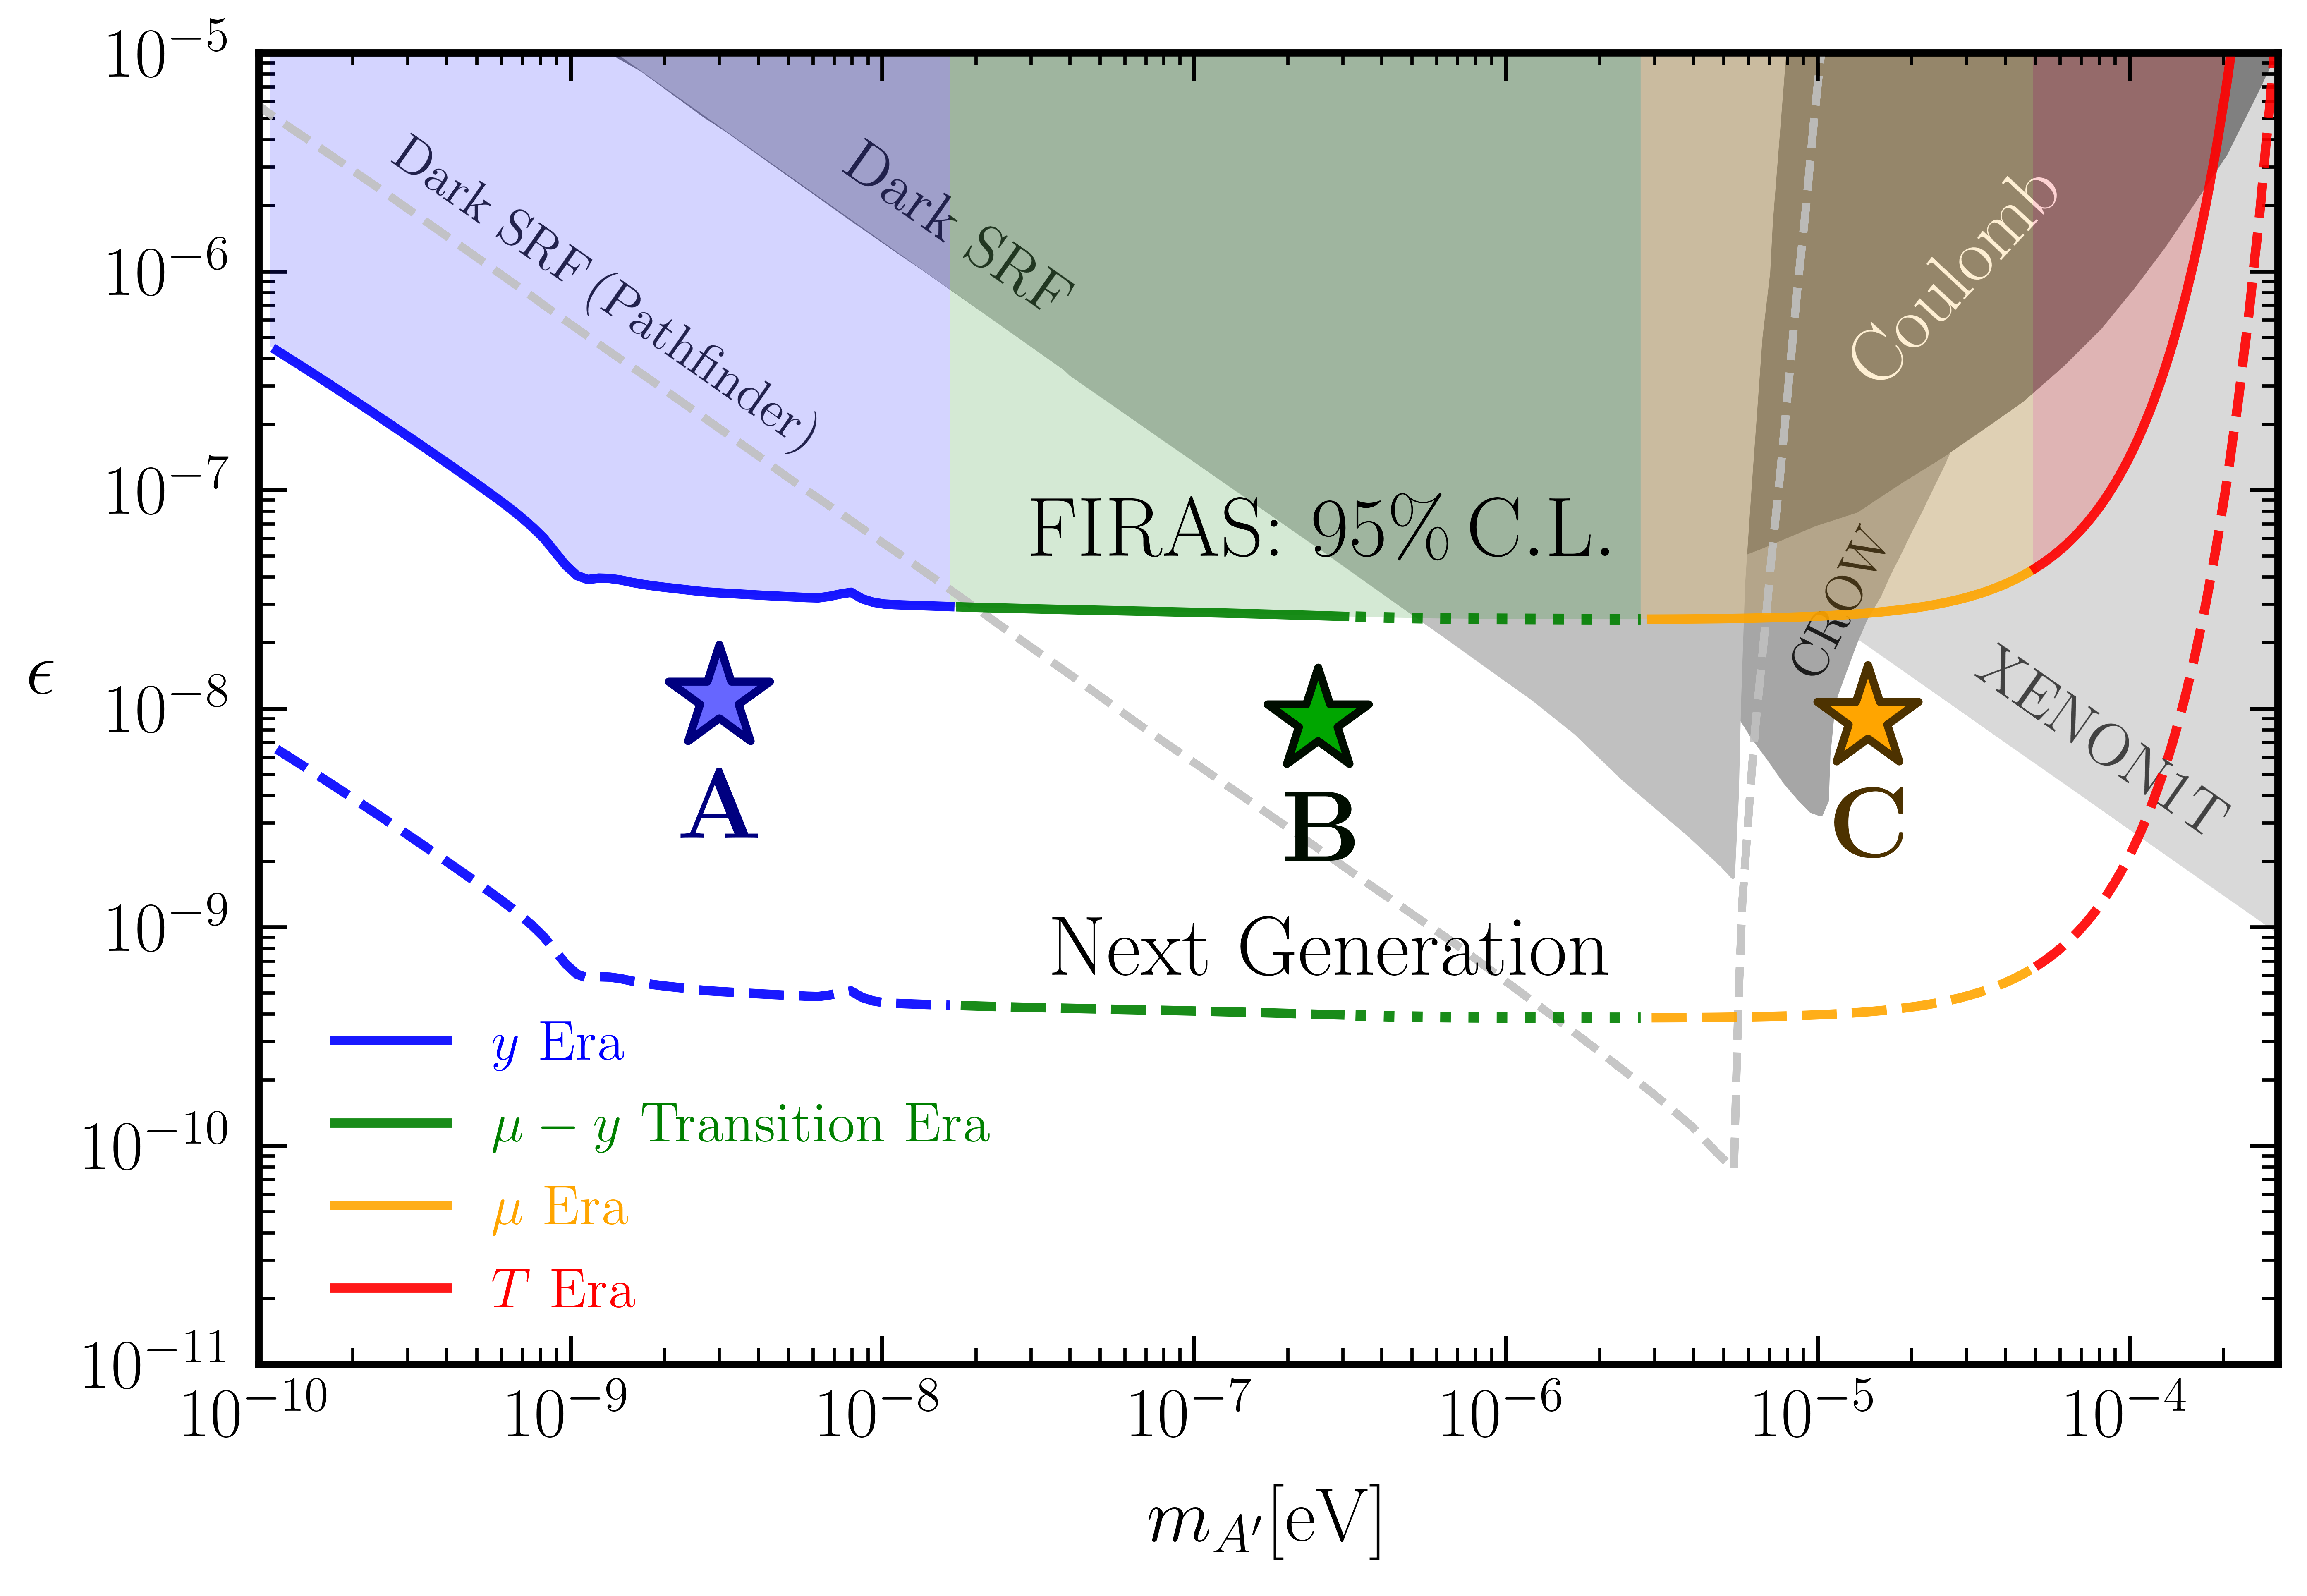

In [25]:
# ====================================================
# Plot Parameters
mAp_pltmin = 1e-10 # eV
mAp_pltmax = 3e-4  # eV

# eps_pltmin = 1e-9
# eps_pltmax = 1e-7

eps_pltmin = 1e-11
eps_pltmax = 1e-5

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick
# ====================================================

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis

# ======================================================================================

# ====================================================
# color for different eras
color_free = 'purple'
color_y    = 'blue'
color_trans= 'green'
color_mu   = 'orange'
color_T    = 'red'
# ====================================================


ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis


ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True)
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19)
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both', left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)

# ======================================================================================


color_XenonSolar       = lighten_color('gray', 0.3)
color_SolarLuminosity  = lighten_color('gray', 0.6)
color_Cavendish        = lighten_color('gray', 1)
color_CROW             = lighten_color('gray', 0.7)
color_DarkSRF          = lighten_color('gray', 0.5)
color_Jupiter          = lighten_color('gray', 0.4)
color_Earth            = lighten_color('gray', 0.6)
color_Samuel           = 'sienna'
color_Redondo          = lighten_color('gray', 1.2)


color_XenonSolar_label       = lighten_color('gray', 1.5)
color_SolarLuminosity_label  = lighten_color('black', 0.9)
color_Cavendish_label        = lighten_color('white', 1)
color_CROW_label             = lighten_color('gray', 1.8)
color_DarkSRF_label          = lighten_color('gray', 1.7)
color_Jupiter_label          = lighten_color('gray', 1.5)
color_Earth_label            = lighten_color('gray', 2)


# ======================================================================================
#Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary [0], XenonSolar_2Dary [1], max(XenonSolar_2Dary [1]), color=color_XenonSolar, alpha=1, zorder=-2)

ax.fill_between(  XenonSolar_2Dary_with_Lext[0], XenonSolar_2Dary_with_Lext[1], max(XenonSolar_2Dary_with_Lext[1]), color=color_XenonSolar, alpha=1, zorder=-2)


# Cavendish-Coulomb

#without interpolation, raw data
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=0)


#CROWS
ax.fill_between(  CROWS_2Dary[0], CROWS_2Dary[1], max(CROWS_2Dary[1]), color=color_CROW, alpha=1, zorder=-1)


#Dark SRF PathFinder (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary_with_LRext[0], DarkSRF_2Dary_with_LRext[1], max(DarkSRF_2Dary_with_LRext[1]), color=color_DarkSRF, alpha=1, zorder=5)

# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
ax.plot(          DarkSRF_Proj_2Dary_with_LRext[0], DarkSRF_Proj_2Dary_with_LRext[1], color=color_DarkSRF, linestyle = 'dashed', linewidth=2.0, zorder=10)

# ======================================================================================

# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65

# ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'Free Streaming Era' )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$y$ Era'            )
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu-y$ Transition Era'     )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu_dotted   , eps_FIRAS_ary_mu_dotted    , color=color_mu   ,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu_solid    , eps_FIRAS_ary_mu_solid     , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu$ Era'          )
ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$T$ Era'            )


# PIXIE projection: Line
# linewidth_PIXIE = 2.3
linewidth_PIXIE_dashed = 2.35
linewidth_PIXIE_dotted = 2.65

ax.plot( mAp_PIXIE_ary_free        , eps_PIXIE_ary_free        , color=color_free  , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_y           , eps_PIXIE_ary_y           , color=color_y     , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_tran_solid  , eps_PIXIE_ary_tran_solid  , color=color_trans , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_tran_dotted , eps_PIXIE_ary_tran_dotted , color=color_trans , linestyle='dotted' , linewidth=linewidth_PIXIE_dotted , zorder=10)
ax.plot( mAp_PIXIE_ary_mu_dotted   , eps_PIXIE_ary_mu_dotted   , color=color_mu    , linestyle='dotted' , linewidth=linewidth_PIXIE_dotted , zorder=10)
ax.plot( mAp_PIXIE_ary_mu_solid    , eps_PIXIE_ary_mu_solid    , color=color_mu    , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_T           , eps_PIXIE_ary_T           , color=color_T     , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)



# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)


ax.text(3e-5  , 0.25e-8, r'XENON1T'       ,  fontweight='bold', fontsize=15, color=color_XenonSolar_label      , rotation=-35, zorder=9)
ax.text(1.2e-5 ,3e-7 , r'Coulomb'      ,  fontweight='bold', fontsize=19, color=color_Cavendish_label       , rotation=47, zorder=9)
ax.text(8.0e-6  , 1.4e-8 , r'CROW'         ,  fontweight='bold', fontsize=13, color=color_CROW_label            , rotation=63, zorder=9)
ax.text(7e-9    , 6e-7, r'Dark SRF'      ,  fontweight='bold', fontsize=15, color=color_DarkSRF_label         , rotation=-35, zorder=9)
ax.text(2.5e-10   , 1.5e-7   , r'Dark SRF\,(Pathfinder)' , fontsize=13 , color=color_DarkSRF_label         , rotation=-35 , zorder=9)

fontsize_FIRAS = 21

ax.text(3e-8 , 5e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", fontsize=fontsize_FIRAS, color='black', zorder=15,  fontweight='bold')
ax.text(3.5e-8 , 6e-10, "Next Generation", fontsize=fontsize_FIRAS, color='black', zorder=15,  fontweight='bold')

color_Era_ary = [color_y, color_trans, color_mu, color_T]

leg = ax.legend(ncol=1, loc='center', bbox_to_anchor=(0.2, 0.15), fontsize=14)

for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)
    
# mAp_starA = 3e-9  # eV
# mAp_starB = 1e-7  # eV
# mAp_starC = 1e-5  # eV

# mAp_starA = 3e-9  # eV
# mAp_starB = 2.5e-7  # eV
# mAp_starC = 1e-5  # eV


mAp_starA = 3e-9  # eV
mAp_starB = 2.5e-7  # eV
mAp_starC = 1.45e-5  # eV

# [eps_starA,eps_starB,eps_starC] = 2 * mAp_eps_FIRAS_fidu_interp([mAp_starA,mAp_starB,mAp_starC])
[eps_starA,eps_starB,eps_starC] = 0.33 * mAp_eps_FIRAS_fidu_interp([mAp_starA,mAp_starB,mAp_starC])
# [eps_starA,eps_starB,eps_starC] = 0.03 * mAp_eps_FIRAS_fidu_interp([mAp_starA,mAp_starB,mAp_starC])

facecolor_A   = lighten_color(color_y,0.6)
facecolor_B   = lighten_color(color_trans,0.9)
facecolor_C   = color_mu

edgecolor_A   = lighten_color(color_y, 1.5)
edgecolor_B   = lighten_color(color_trans, 1.3)
edgecolor_C   = lighten_color(color_mu, 1.7)

plt.text(0.75*mAp_starA, 0.23*eps_starA, r'\bf{A}', fontsize=25, color=edgecolor_A, rotation=0)
plt.text(0.78*mAp_starB, 0.23*eps_starB, r'\bf{B}', fontsize=25, color=edgecolor_B, rotation=0)
plt.text(0.78*mAp_starC, 0.23*eps_starC, r'\bf{C}', fontsize=25, color=edgecolor_C, rotation=0)

plt.scatter( [mAp_starA,mAp_starB,mAp_starC] , [eps_starA,eps_starB,eps_starC] , color = [facecolor_A,facecolor_B,facecolor_C],  
            edgecolor=[edgecolor_A,edgecolor_B,edgecolor_C], linewidth = 2,
            marker='*', s=700, zorder=19 )  #creates plot with star marker

# fig.suptitle(r"\bf{Dark Photon Constraints}", y=0.94, fontsize=18)

plt.savefig('../plots/mAp_eps_plt_zoomin_star.png', dpi=350)
plt.savefig('../plots/mAp_eps_plt_zoomin_star.pdf')

TCMB_0 =  2.7255 K
Error Bar is Multiplied by 100 Times


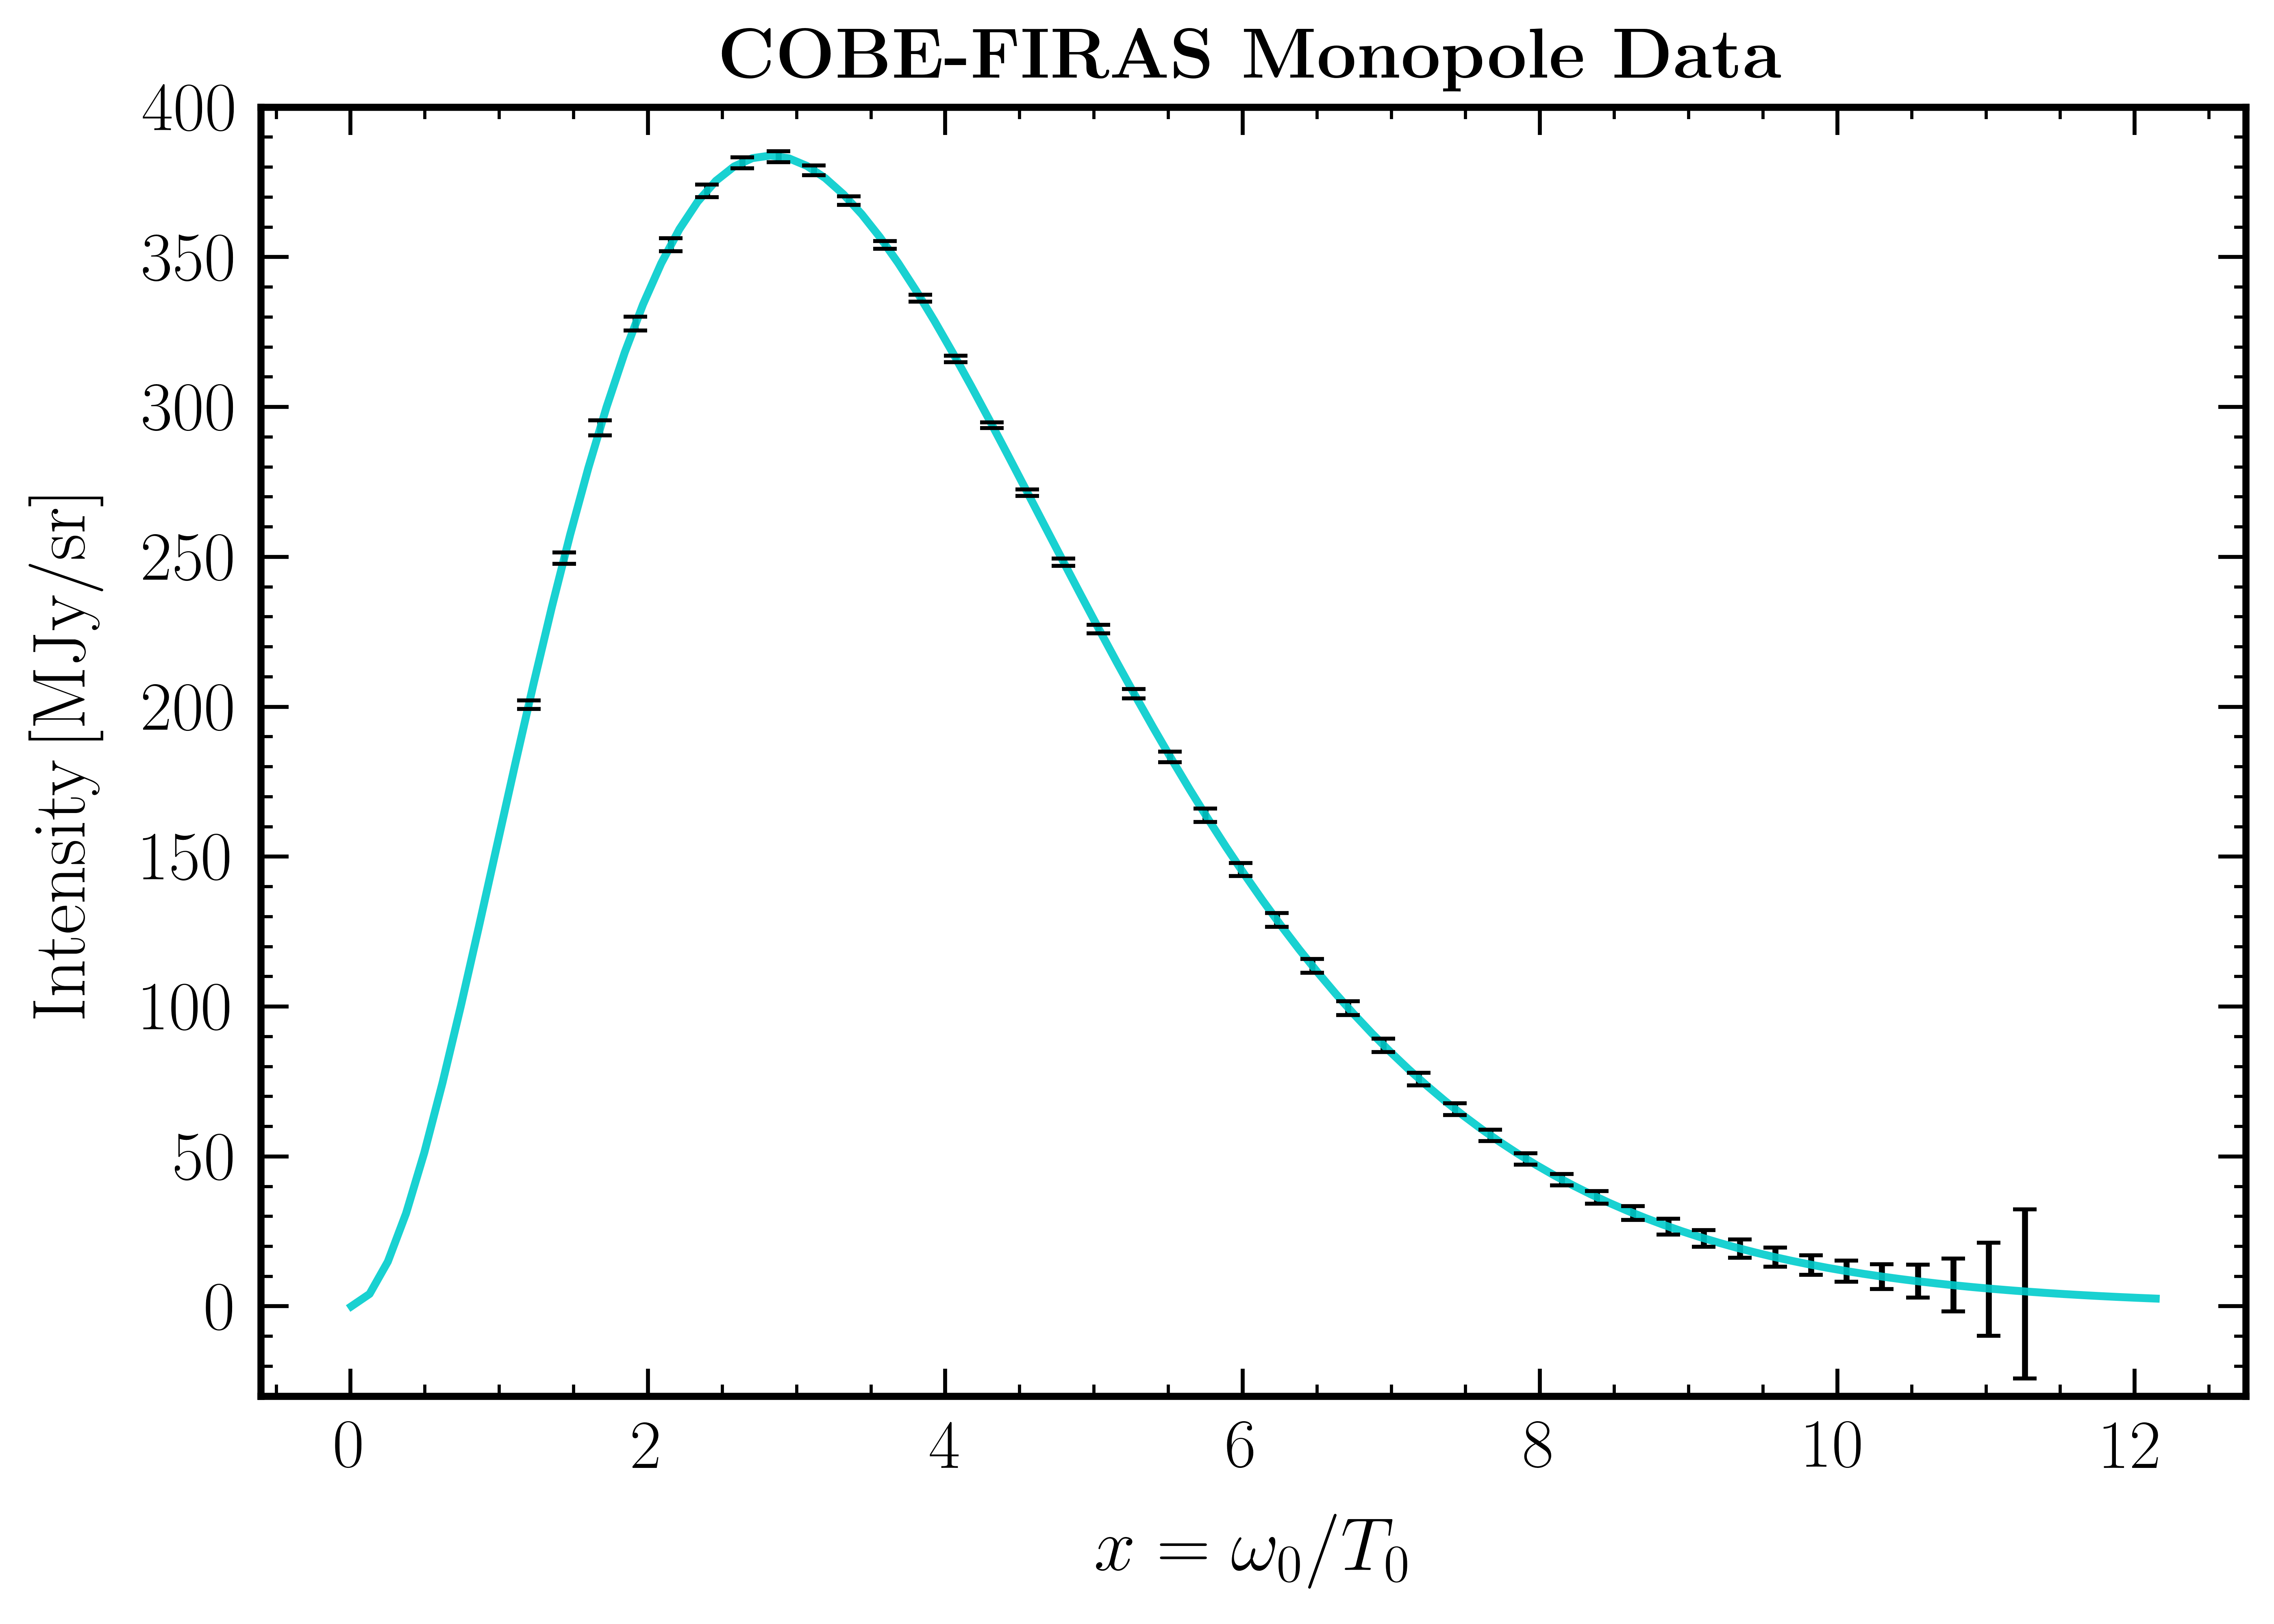

In [29]:
print('TCMB_0 = ', TCMB_0/K, 'K')


nu_ary_plt = np.linspace(0.01,23,100) # in cm^-1
x_art_plt  = 2 * np.pi * nu_ary_plt * cmInv_to_eV/TCMB_0

FIRAS_x_ary = 2 * np.pi * FIRAS_nu_ary * cmInv_to_eV/TCMB_0

T0_test = TCMB_0

x_prime_int_test = np.logspace(-4,2,1000)

fig, ax = plt.subplots()

fig.set_size_inches(9,6)

# We multiply the error bar by 100 times
# Note that the unit for sigma in FIRAS data is kJy/sr
Multiply_Error = 100
print('Error Bar is Multiplied by', Multiply_Error, 'Times')

y_errorbar_plt = [ Multiply_Error * (1/MJy_to_kJy) * FIRAS_sigma_ary, Multiply_Error * (1/MJy_to_kJy) * FIRAS_sigma_ary]

plt.plot( x_art_plt,  I0( x_art_plt, TCMB_0, units='MJy' )  , label = r'$I^{(0)}$', color = lighten_color('cyan', 1.2), linewidth = 2 )

plt.errorbar(FIRAS_x_ary, FIRAS_I0_ary + (1/MJy_to_kJy) * FIRAS_res_ary, y_errorbar_plt, color='black', fmt='none', capsize=3, capthick=1, elinewidth=1.5)

plt.title(r'\bf{COBE-FIRAS Monopole Data}')


plt.xlabel(r'$x = \omega_0/T_0$')
plt.ylabel(r'Intensity\,[MJy/sr]')

plt.ylim(-30, 400)

plt.savefig('../plots/COBEFIRAS_Data_Plot.pdf')

In [30]:
# PIXIE Sensitivity 2405.20403
# nu: GHz
# Del I: Jr/sr

# nu[GHz] - Del_I[Jr/sr] 2D Array
nu_DelI_PIXIE_Sensitivity_2Dary   = np.transpose( np.array( pd.read_csv('../data/PIXIE_Sensitivity.csv') ) )

# x - Del_I[Jr/sr] 2D Array
x_DelI_PIXIE_Sensitivity_2Dary  = np.vstack(( (2*np.pi*1e9*sInv_to_eV/TCMB_0) * nu_DelI_PIXIE_Sensitivity_2Dary[0], nu_DelI_PIXIE_Sensitivity_2Dary[1]))

We time PIXIE sensitivity by  100
mAp_1   =  3e-09 eV
eps_1   =  1.1180511205305375e-08


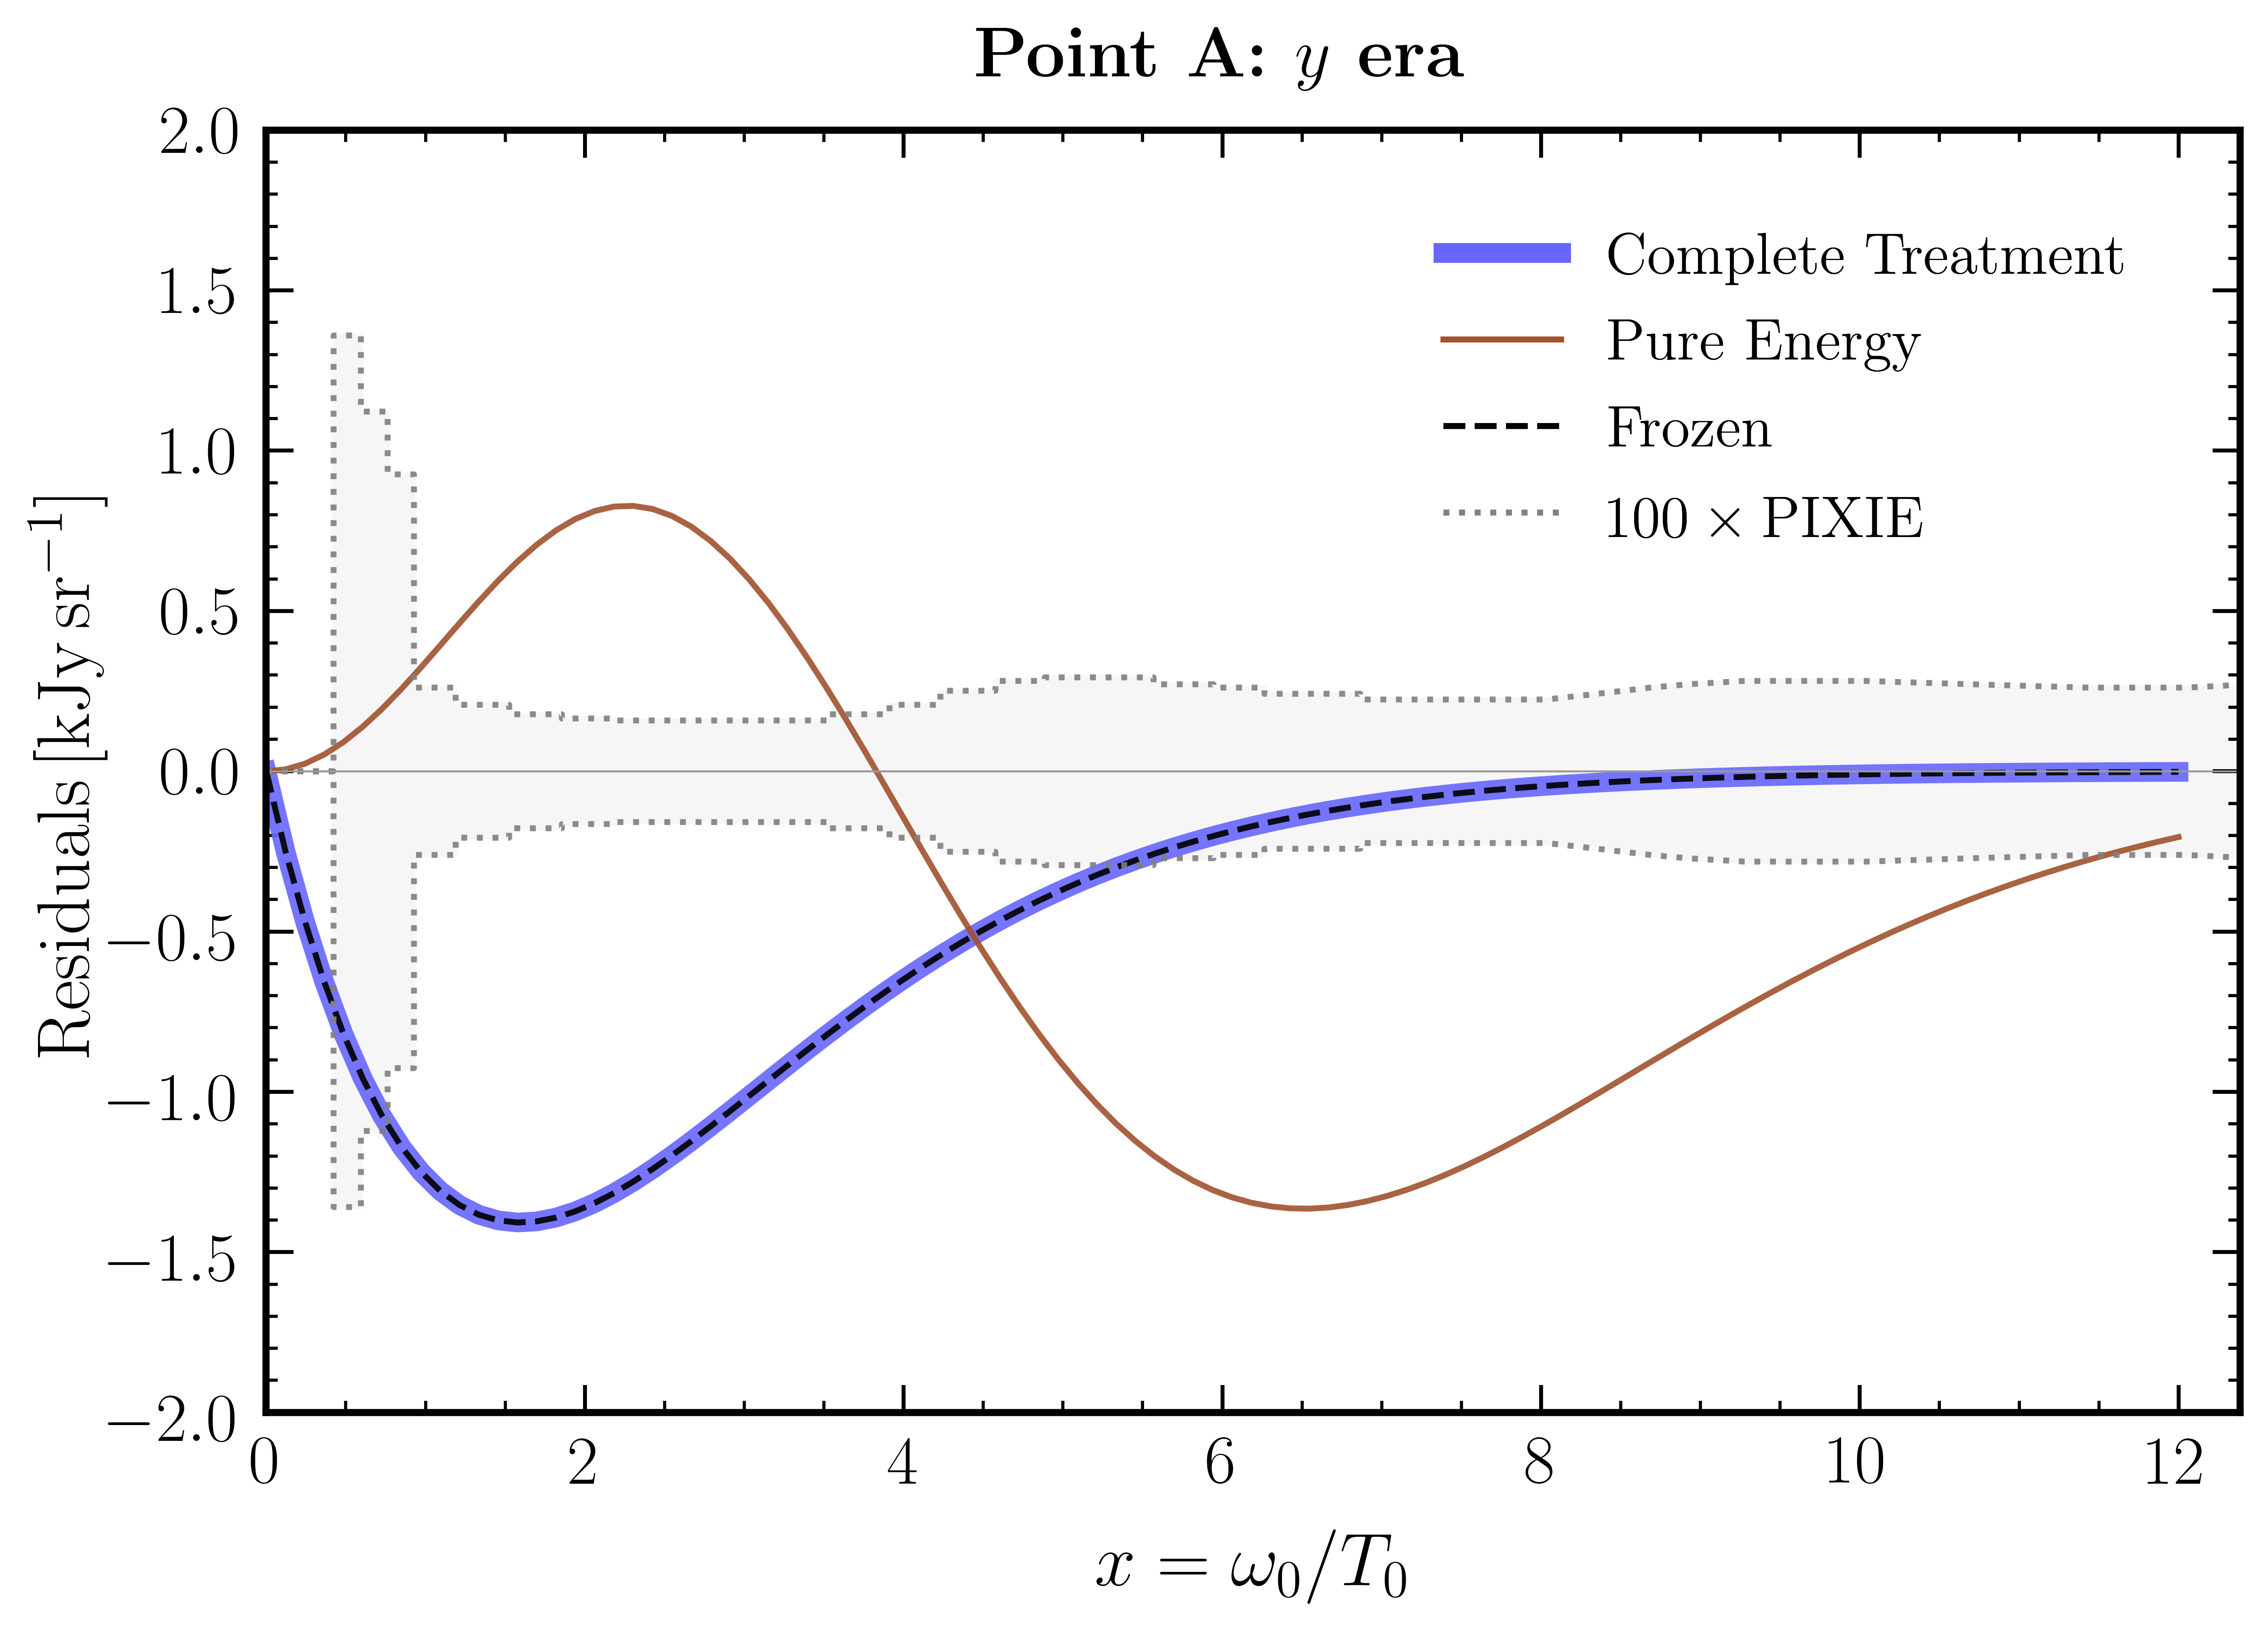

In [31]:
x_test  = np.linspace(1e-3,12,100)
nu_ary_test = ( x_test*TCMB_0/(2*np.pi) ) / cmInv_to_eV

x_prime_int_test = np.logspace(-2,2,1000)

MJy_to_kJy  = 10**3
MJy_to_Jy   = 10**6

Jy_to_kJy   = 10**(-3)

# ========================================================================================
color_1       = facecolor_A

m_Ap_test_1   = mAp_starA    #in eV
eps_test_1    = eps_starA

DeltaI_kJy_1  = MJy_to_kJy * eps_test_1**2 * DeltaI_over_eps2_muy_trans( x_test, x_prime_int_test, m_Ap_test_1, TCMB_0, units = 'MJy' )

# ========================================================================================
color_th      = color_Samuel

m_Ap_test_th  = m_Ap_test_1    #in eV
eps_test_th   = eps_test_1
DeltaI_kJy_th = MJy_to_kJy * eps_test_th**2 * DeltaI_over_eps2_y_th(x_test, x_prime_int_test, m_Ap_test_th, TCMB_0, units = 'MJy')

# ========================================================================================

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

fig.set_size_inches(9, 6)

# Note that the unit for sigma in FIRAS data is kJy/sr
DeltaI_1_Plt,  = ax.plot(    x_test,   DeltaI_kJy_1 , color=color_1, label='Complete Treatment', linewidth = 5 )
DeltaI_th_Plt, = ax.plot(    x_test,   DeltaI_kJy_th, color=color_th, label='Pure Energy', linewidth = 1.5 )


DeltaI_FreeStream_Plt, = ax.plot(    x_test,  - (eps_test_1**2 * np.transpose( P_over_eps2_interp(m_Ap_test_1, x_test) )[0]) * MJy_to_kJy * I0( x_test, TCMB_0, units='MJy' ) , color=lighten_color('black', 1), linestyle = 'dashed', 
                                 label=r'Frozen', linewidth = 1.5  )

# FIRAS_Plt = ax.errorbar(FIRAS_x_ary,  FIRAS_res_ary, FIRAS_sigma_ary, fmt='none', capsize=3, capthick=1, elinewidth=1.5, color = lighten_color(cols_default[8],1.5), label='COBE-FIRAS Data' )


PIXIE_times = 100

print("We time PIXIE sensitivity by ", PIXIE_times)


PIXIE_Plt_Plus , = ax.plot(  x_DelI_PIXIE_Sensitivity_2Dary[0], PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, label = r'$100 \times \mathrm{PIXIE}$', color = 'gray', linewidth = 1.5, linestyle = 'dotted' )
PIXIE_Plt_Minus, = ax.plot(  x_DelI_PIXIE_Sensitivity_2Dary[0], - PIXIE_times *x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, color = 'gray', linewidth = 1.5, linestyle = 'dotted' )

PIXIE_fill_color = lighten_color('gray',0.07)

ax.fill_between( x_DelI_PIXIE_Sensitivity_2Dary[0], - PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, color =PIXIE_fill_color )

ax.axhline(0., c=cols_default[8], ls='-', lw=0.5)

# FIRAS_legend  = plt.legend(handles=[FIRAS_Plt], bbox_to_anchor=(0.23,0.9), loc= 'center', fontsize=17)
DeltaI_legend = plt.legend(handles=[DeltaI_1_Plt, DeltaI_th_Plt, DeltaI_FreeStream_Plt, PIXIE_Plt_Plus], bbox_to_anchor=(0.77,0.8), fontsize=15, loc= 'center' )

# ax.add_artist(FIRAS_legend)
ax.add_artist(DeltaI_legend)

ax.set_xlabel(r"$x=\omega_0/T_0$")
ax.set_ylabel("Residuals\,$[\mathrm{kJy}\,\mathrm{sr}^{-1}]$", labelpad=0.1)

ax.set_xlim( 0, np.max(FIRAS_x_ary)*1.1 )
ax.set_ylim(-2,2)

# ax.set_xlim( 0, np.max(FIRAS_x_ary)*1.1 )
# ax.set_ylim(-5e-2,5e-2)

plt.suptitle(r"\bf{Point A: $y$ era}", y=0.94, fontsize=18)

plt.savefig('../plots/Distortion_y.png', dpi=350)
plt.savefig('../plots/Distortion_y.pdf')

print('mAp_1   = ', m_Ap_test_1, 'eV' )
print('eps_1   = ', eps_test_1        )

We time PIXIE sensitivity by  100
mAp_1   =  1.45e-05 eV
eps_1   =  9.032414183093718e-09


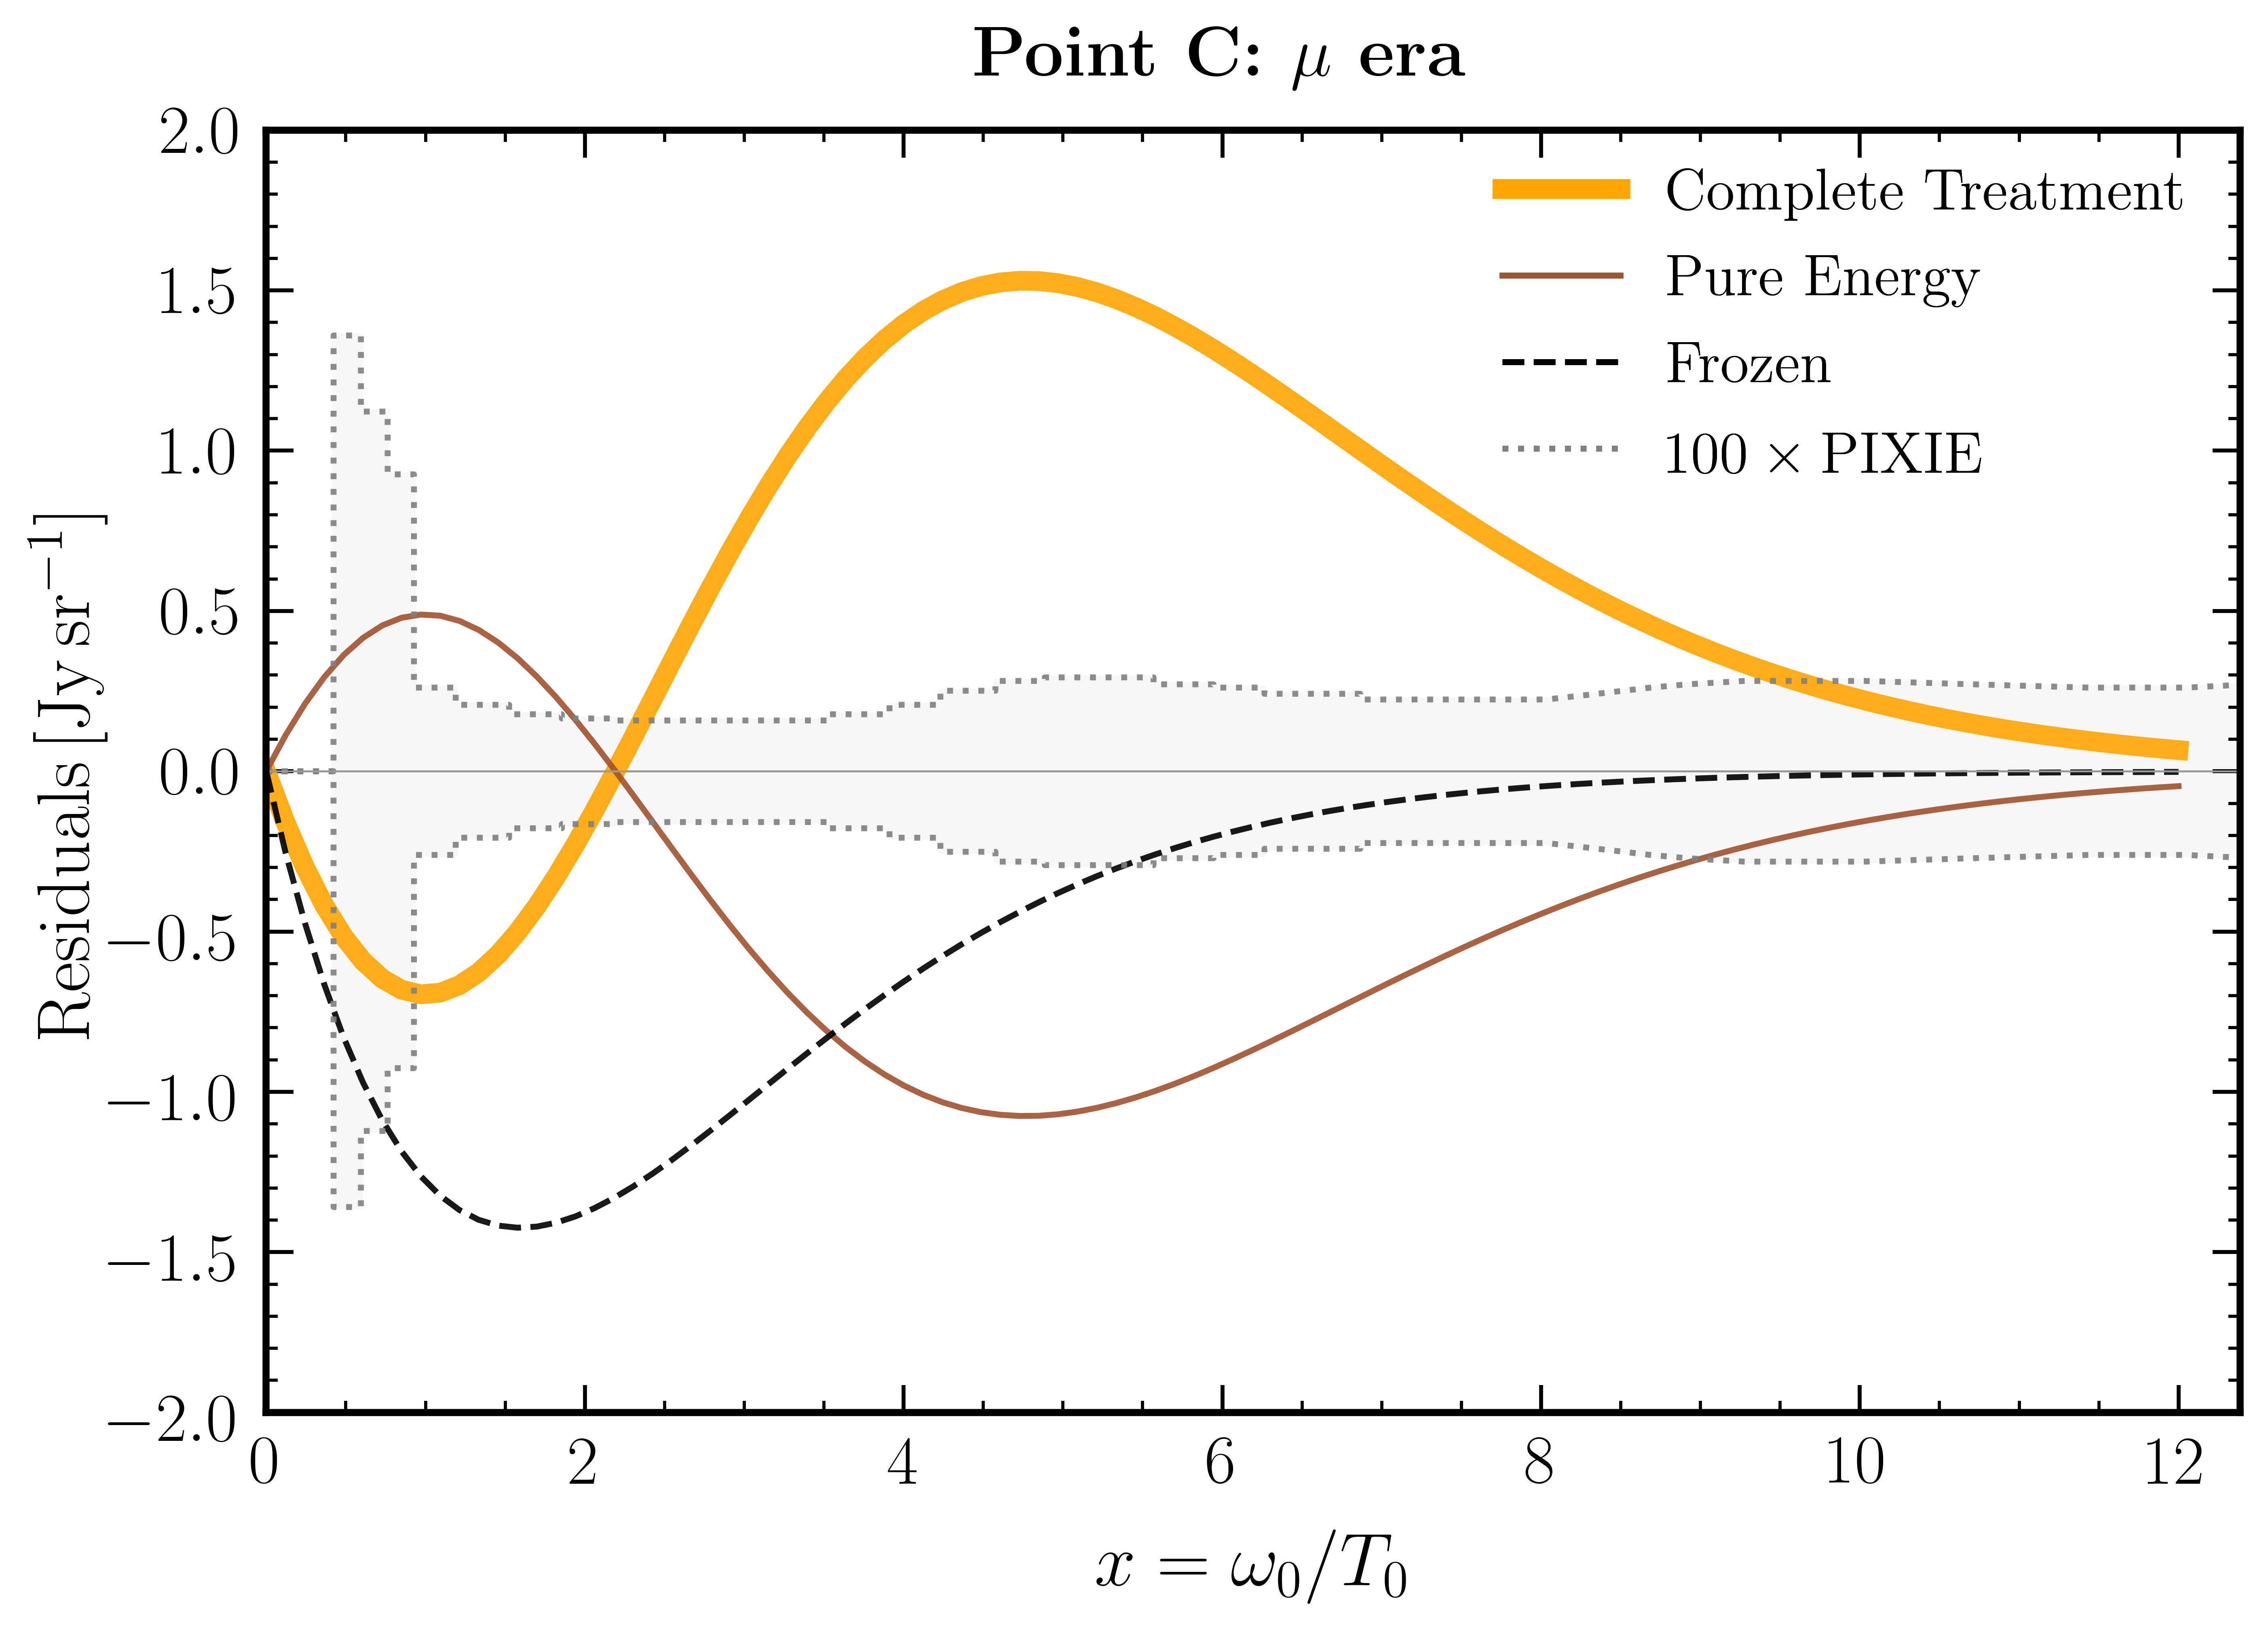

In [32]:
x_test  = np.linspace(1e-3,12,100)
nu_ary_test = ( x_test*TCMB_0/(2*np.pi) ) / cmInv_to_eV

x_prime_int_test = np.logspace(-2,2,1000)

# ========================================================================================
color_1       = facecolor_C

m_Ap_test_1   = mAp_starC    #in eV
eps_test_1    = eps_starC

DeltaI_kJy_1  = MJy_to_kJy * eps_test_1**2 * DeltaI_over_eps2_muy_trans( x_test, x_prime_int_test, m_Ap_test_1, TCMB_0, units = 'MJy' )

# ========================================================================================
color_th      = color_Samuel

m_Ap_test_th  = m_Ap_test_1    #in eV
eps_test_th   = eps_test_1
DeltaI_kJy_th = MJy_to_kJy * eps_test_th**2 * DeltaI_over_eps2_mu_th(x_test, x_prime_int_test, m_Ap_test_th, TCMB_0, units = 'MJy')

# ========================================================================================

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

fig.set_size_inches(9, 6)

# Note that the unit for sigma in FIRAS data is kJy/sr
DeltaI_1_Plt,  = ax.plot(    x_test,   DeltaI_kJy_1 , color=color_1, label='Complete Treatment', linewidth = 5 )
DeltaI_th_Plt, = ax.plot(    x_test,   DeltaI_kJy_th, color=color_th, label='Pure Energy', linewidth = 1.5 )


DeltaI_FreeStream_Plt, = ax.plot(    x_test,  - (eps_test_1**2 * np.transpose( P_over_eps2_interp(m_Ap_test_1, x_test) )[0]) * MJy_to_kJy * I0( x_test, TCMB_0, units='MJy' ) , color=lighten_color('black', 1), linestyle = 'dashed', 
                                 label=r'Frozen', linewidth = 1.5  )

# FIRAS_Plt = ax.errorbar(FIRAS_x_ary,  FIRAS_res_ary, FIRAS_sigma_ary, fmt='none', capsize=3, capthick=1, elinewidth=1.5, color = lighten_color(cols_default[8],1.5), label='COBE-FIRAS Data' )


PIXIE_times = 100

print("We time PIXIE sensitivity by ", PIXIE_times)

PIXIE_Plt_Plus , = ax.plot(  x_DelI_PIXIE_Sensitivity_2Dary[0], PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, label = r'$100 \times \mathrm{PIXIE}$', color = 'gray', linewidth = 1.5, linestyle = 'dotted' )
PIXIE_Plt_Minus, = ax.plot(  x_DelI_PIXIE_Sensitivity_2Dary[0], - PIXIE_times *x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, color = 'gray', linewidth = 1.5, linestyle = 'dotted' )


PIXIE_fill_color = lighten_color('gray',0.07)

ax.fill_between( x_DelI_PIXIE_Sensitivity_2Dary[0], - PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, color =PIXIE_fill_color )


ax.axhline(0., c=cols_default[8], ls='-', lw=0.5)

# FIRAS_legend  = plt.legend(handles=[FIRAS_Plt], bbox_to_anchor=(0.23,0.9), loc= 'center', fontsize=17)
DeltaI_legend = plt.legend(handles=[DeltaI_1_Plt, DeltaI_th_Plt, DeltaI_FreeStream_Plt, PIXIE_Plt_Plus], bbox_to_anchor=(0.8,0.85), fontsize=15, loc= 'center' )

# ax.add_artist(FIRAS_legend)
ax.add_artist(DeltaI_legend)


ax.set_xlabel(r"$x=\omega_0/T_0$")
ax.set_ylabel("Residuals\,$[\mathrm{Jy}\,\mathrm{sr}^{-1}]$", labelpad=0.1)

ax.set_xlim( 0, np.max(FIRAS_x_ary)*1.1 )
ax.set_ylim(-2, 2)

plt.suptitle(r"\bf{Point C: $\mu$ era}", y=0.94, fontsize=18)

plt.savefig('../plots/Distortion_mu.png', dpi=350)
plt.savefig('../plots/Distortion_mu.pdf')

print('mAp_1   = ', m_Ap_test_1, 'eV')
print('eps_1   = ', eps_test_1     )

We time PIXIE sensitivity by  100
mAp_1   =  2.5e-07 eV
eps_1   =  8.796503346551572e-09


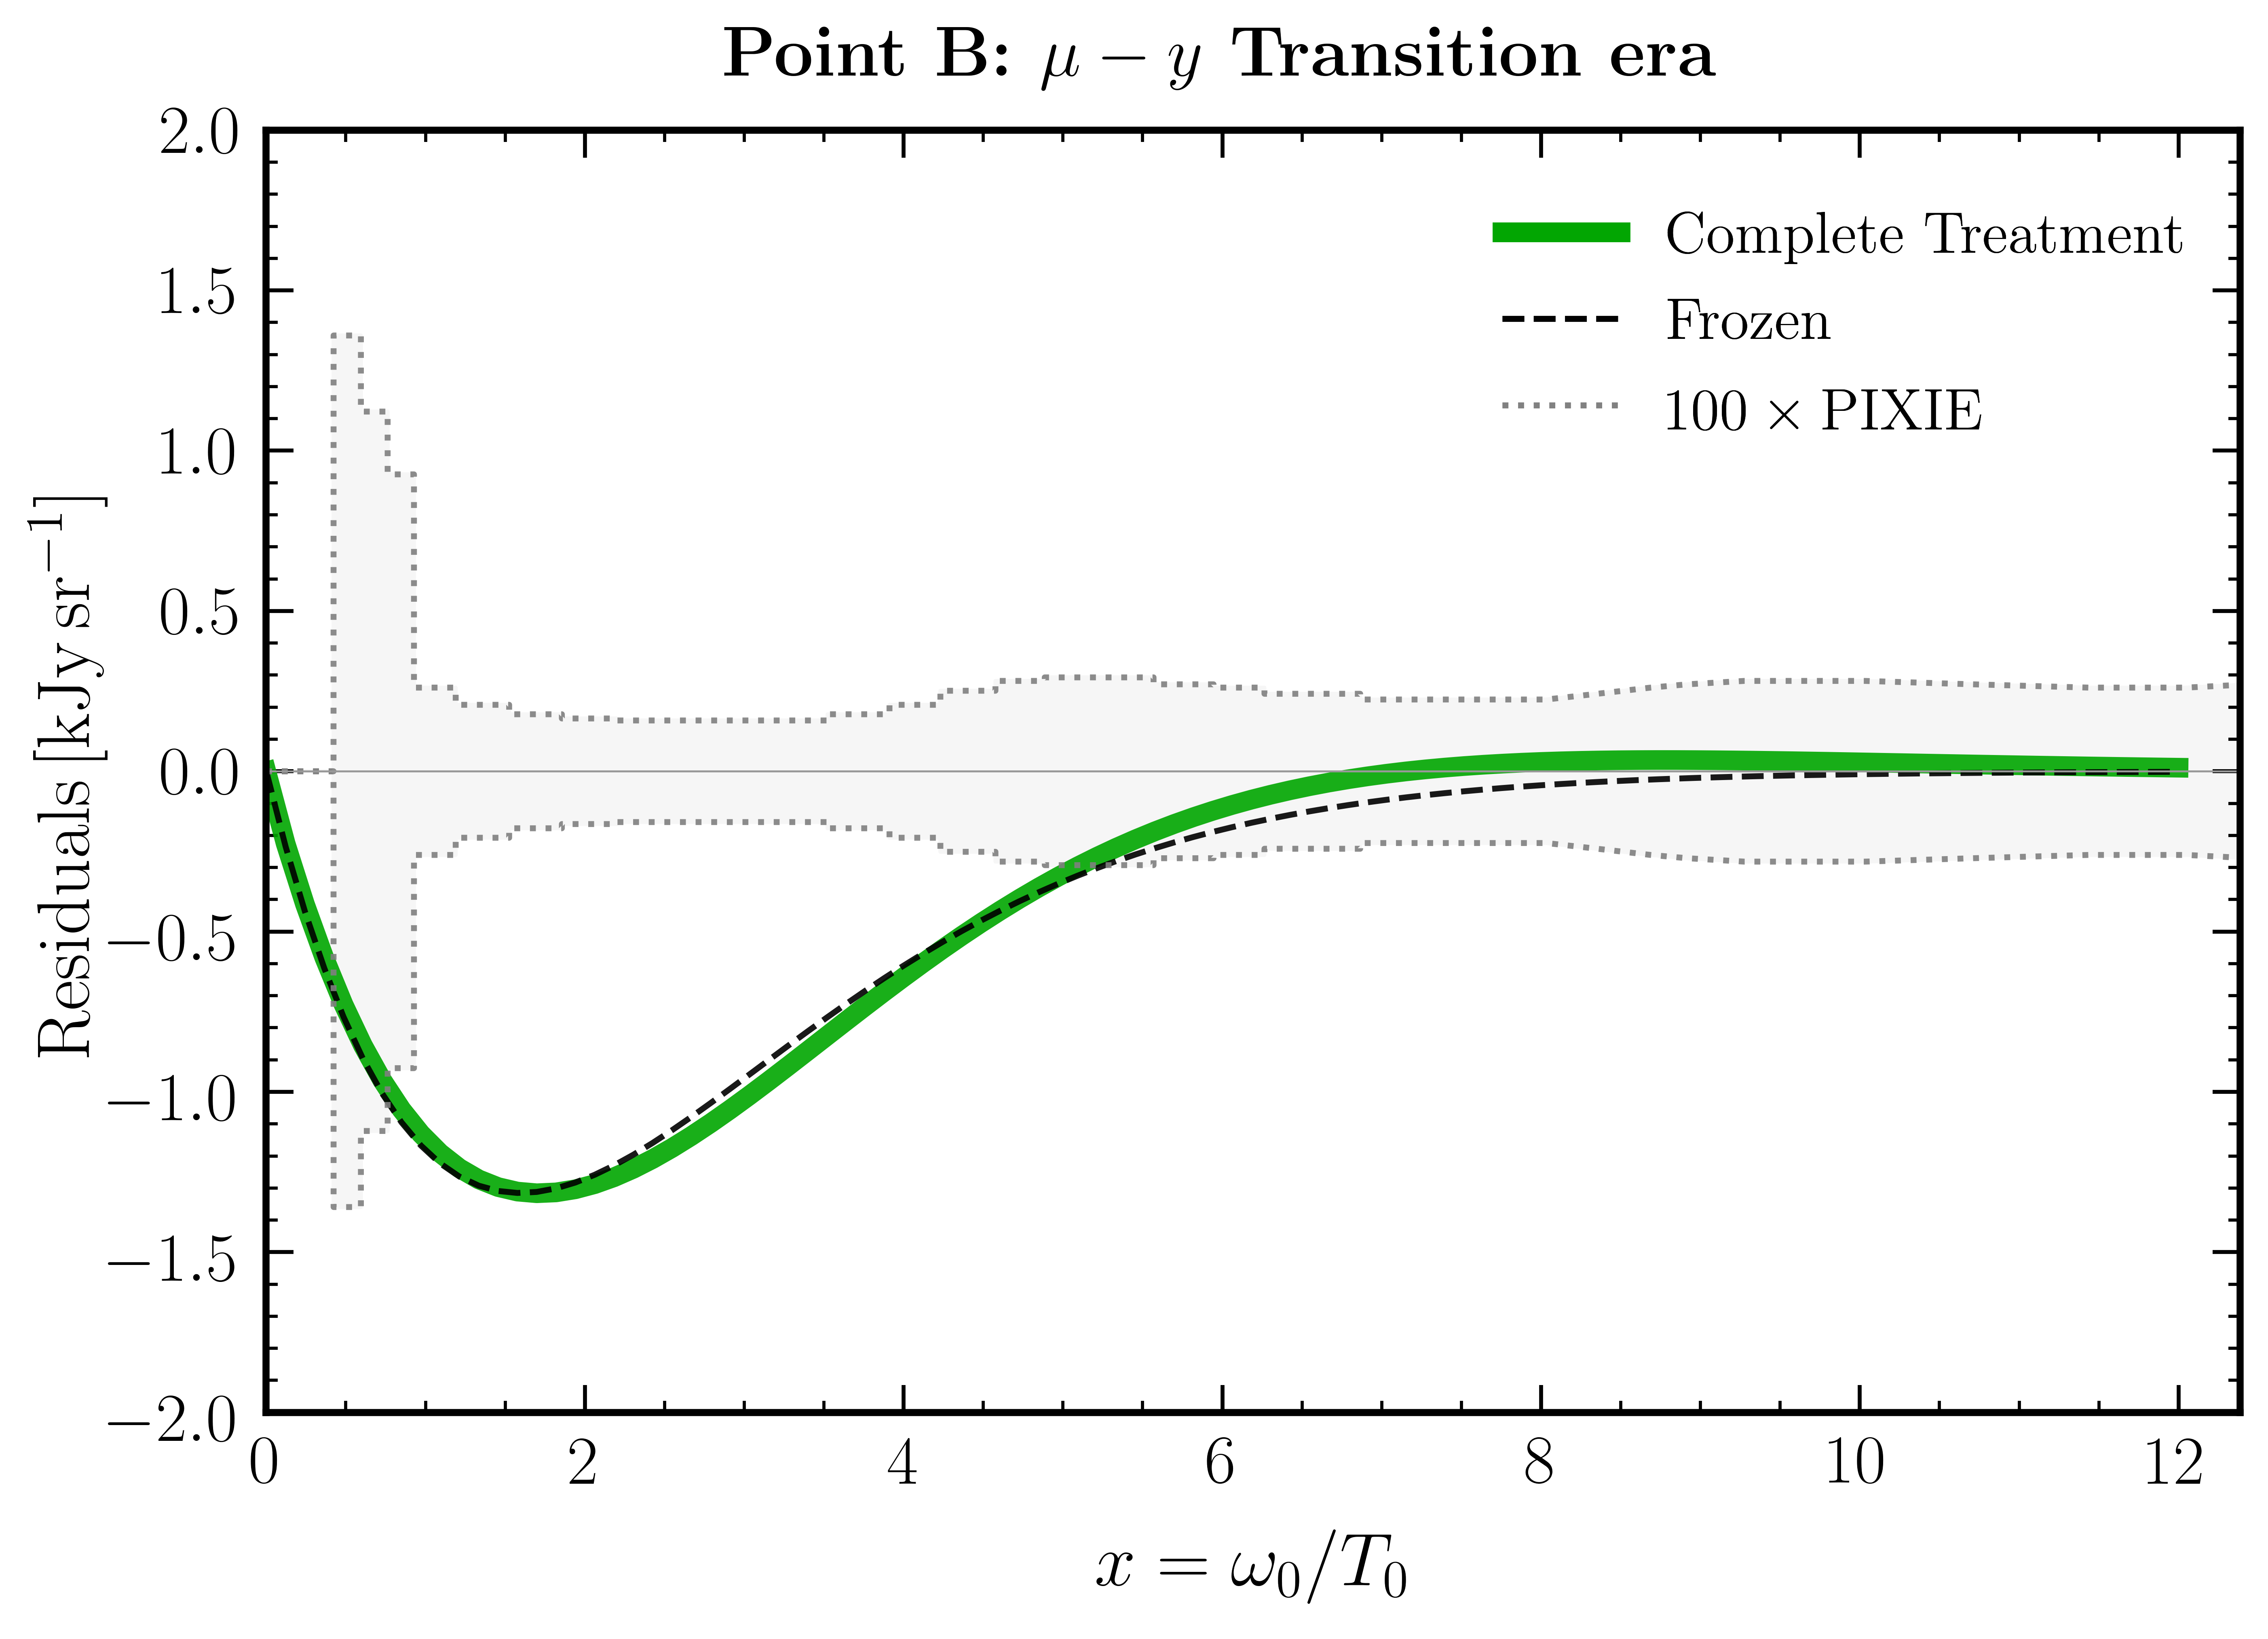

In [33]:
x_test  = np.linspace(1e-3,12,100)
nu_ary_test = ( x_test*TCMB_0/(2*np.pi) ) / cmInv_to_eV

x_prime_int_test = np.logspace(-2,2,1000)

# ========================================================================================
color_1       = facecolor_B

m_Ap_test_1   = mAp_starB    #in eV
eps_test_1    = eps_starB

DeltaI_kJy_1  = MJy_to_kJy * eps_test_1**2 * DeltaI_over_eps2_muy_trans( x_test, x_prime_int_test, m_Ap_test_1, TCMB_0, units = 'MJy' )

# ========================================================================================

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

fig.set_size_inches(9, 6)

# Note that the unit for sigma in FIRAS data is kJy/sr
DeltaI_1_Plt,  = ax.plot(    x_test,   DeltaI_kJy_1 , color=color_1, label='Complete Treatment', linewidth = 5 )


DeltaI_FreeStream_Plt, = ax.plot(    x_test,  - (eps_test_1**2 * np.transpose( P_over_eps2_interp(m_Ap_test_1, x_test) )[0]) * MJy_to_kJy * I0( x_test, TCMB_0, units='MJy' ) , color=lighten_color('black', 1), linestyle = 'dashed', 
                                 label=r'Frozen', linewidth = 1.5  )

# FIRAS_Plt = ax.errorbar(FIRAS_x_ary,  FIRAS_res_ary, FIRAS_sigma_ary, fmt='none', capsize=3, capthick=1, elinewidth=1.5, color = lighten_color(cols_default[8],1.5), label='COBE-FIRAS Data' )

PIXIE_times = 100

print("We time PIXIE sensitivity by ", PIXIE_times)

PIXIE_Plt_Plus , = ax.plot(  x_DelI_PIXIE_Sensitivity_2Dary[0], PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, label = r'$100 \times \mathrm{PIXIE}$', color = 'gray', linewidth = 1.5, linestyle = 'dotted' )
PIXIE_Plt_Minus, = ax.plot(  x_DelI_PIXIE_Sensitivity_2Dary[0], - PIXIE_times *x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, color = 'gray', linewidth = 1.5, linestyle = 'dotted' )

PIXIE_fill_color = lighten_color('gray',0.07)

ax.fill_between( x_DelI_PIXIE_Sensitivity_2Dary[0], - PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, PIXIE_times *  x_DelI_PIXIE_Sensitivity_2Dary[1] * Jy_to_kJy, color =PIXIE_fill_color )


ax.axhline(0., c=cols_default[8], ls='-', lw=0.5)

# FIRAS_legend  = plt.legend(handles=[FIRAS_Plt], bbox_to_anchor=(0.23,0.9), loc= 'center', fontsize=17)
DeltaI_legend = plt.legend(handles=[DeltaI_1_Plt, DeltaI_FreeStream_Plt, PIXIE_Plt_Plus], bbox_to_anchor=(0.8,0.85), fontsize=15, loc= 'center' )

# ax.add_artist(FIRAS_legend)
ax.add_artist(DeltaI_legend)


ax.set_xlabel(r"$x=\omega_0/T_0$")
ax.set_ylabel("Residuals\,$[\mathrm{kJy}\,\mathrm{sr}^{-1}]$", labelpad=0.1)

ax.set_xlim( 0, np.max(FIRAS_x_ary)*1.1 )
ax.set_ylim(-2, 2)

plt.suptitle(r"\bf{Point B: $\mu-y$ Transition era}", y=0.94, fontsize=18)

plt.savefig('../plots/Distortion_trans.png', dpi=350)
plt.savefig('../plots/Distortion_trans.pdf')

print('mAp_1   = ', m_Ap_test_1, 'eV')
print('eps_1   = ', eps_test_1     )